# INTRODUCTION

## Study Case: New York City TLC Trip Record

Studi kasus ini merupakan Capstone Project Modul 2 Job Connector Data Scientist and Machine Learning dari Purwadhika Digital Technology School.

Pemilik : Gian Habli Maulana

Tanggal : 25 Juni 2024 - 10 Juli 2024

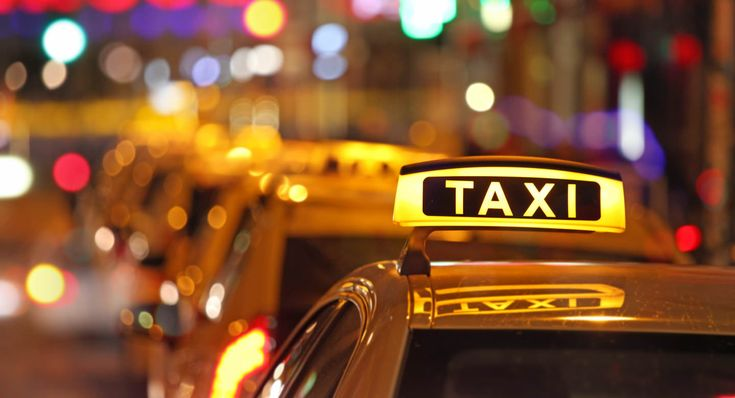

## 1. Business Understanding

### Background:

Layanan taksi di New York City, yang diatur oleh Taxi and Limousine Commission
(TLC), merupakan bagian integral dari sistem transportasi kota. Dengan populasi dan jumlah
wisatawan yang besar, permintaan akan layanan taksi sangat tinggi dan berfluktuasi sepanjang
hari. Mengelola operasi taksi secara efektif adalah tantangan besar, terutama dalam hal
mengoptimalkan waktu dan lokasi penjemputan untuk mengurangi waktu tunggu penumpang
dan meningkatkan efisiensi armada.

Seiring dengan perkembangan teknologi dan meningkatnya ketersediaan data besar
(big data), analisis data historis perjalanan taksi menjadi mungkin dan sangat bermanfaat. Data
perjalanan yang direkam oleh TLC mencakup informasi detail tentang waktu dan lokasi penjemputan serta pengantaran. Dengan menerapkan Exploratory Data Analysis (EDA) pada
data ini, kita dapat mengeksplorasi pola-pola permintaan taksi dan memahami dinamika
operasionalnya secara lebih mendalam.

### Problem Statement:

Dalam industri taksi, memahami pola permintaan pelanggan, preferensi wilayah, dan faktor-faktor yang mempengaruhi kepuasan pelanggan (misalnya, melalui tip) adalah kunci untuk mengoptimalkan operasi dan meningkatkan profitabilitas. Dengan menilai kapan dan di mana layanan paling dibutuhkan serta apa yang mendorong pelanggan memberikan apresiasi lebih, perusahaan dapat membuat keputusan yang lebih tepat mengenai penjadwalan armada, strategi penetapan harga, dan inisiatif pemasaran.

Analisis data yang komprehensif diperlukan untuk mengidentifikasi pola dan tren dalam permintaan pelanggan, preferensi wilayah, dan kepuasan pelanggan. Data ini dapat mencakup informasi tentang waktu dan lokasi penjemputan, jarak perjalanan, durasi perjalanan, tarif, metode pembayaran, dan tip.

Dengan menggunakan teknik analisis data seperti visualisasi data, statistik deskriptif dan inferensial, perusahaan dapat memperoleh wawasan yang berharga tentang perilaku pelanggan dan preferensi mereka. Wawasan ini dapat digunakan untuk mengembangkan strategi yang lebih efektif untuk memenuhi kebutuhan pelanggan dan meningkatkan kepuasan pelanggan.


### Goals:

Objective 1: Analyze Taxi Demand in New York City
- Mengidentifikasi hari dan waktu permintaan puncak.
- Memahami hubungan antara permintaan dan faktor-faktor seperti hari dalam seminggu, waktu hari, dan lokasi.


Objective 2: Explore Customer Preferences and Behavior
- Memahami preferensi pembayaran pelanggan dan karakteristik perjalanan.
- Mengidentifikasi preferensi pelanggan untuk jenis perjalanan, lokasi penjemputan, dan tujuan.


Objective 3: Evaluate Fare Structures for NYC Taxi Services
- Menganalisis hubungan antara struktur tarif, karakteristik perjalanan, dan pendapatan.
- Mengidentifikasi peluang untuk menyesuaikan struktur tarif untuk memaksimalkan pendapatan sambil tetap mempertahankan kepuasan pelanggan.


Objective 4: Investigate Factors Affecting Tips for Taxi Drivers
- Mengidentifikasi faktor-faktor yang mempengaruhi jumlah tips yang diterima oleh pengemudi taksi.
- Memahami hubungan antara tips dan faktor-faktor seperti jarak perjalanan, durasi, dan waktu hari.


Objective 5: Develop Recommendations for Improving Taxi Services in New York City
- Berdasarkan wawasan yang diperoleh dari analisis, merumuskan rekomendasi untuk meningkatkan layanan taksi di Kota New York.
- Rekomendasi ini dapat mencakup perubahan pada struktur tarif, strategi pengiriman, layanan pelanggan, dan pelatihan pengemudi.
- Gunakan informasi ini untuk mengembangkan dan melaksanakan strategi untuk meningkatkan kualitas dan efisiensi layanan taksi secara keseluruhan di Kota New York.

### Key Stakeholders:

1. **Pemerintah Kota New York**: Bertanggung jawab dalam mengatur layanan taksi dan memastikan efisiensi sistem transportasi.

2. **Taxi and Limousine Commission (TLC)**:
Badan pemerintah yang bertanggung jawab mengawasi layanan taksi di New York City.

3. **Operator Taksi:**
Perusahaan atau individu yang mengoperasikan armada taksi di New York City.


## 2. Import Libraries

In [98]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

color = sns.color_palette("Paired")

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## 3. Load Dataset

**Desription Features**

| Features                  | Description                                                                                                                   |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------|   
|``lpep_pickup_datetime``   | Tanggal dan waktu saat perjalanan taksi dimulai.                                                                              |
|``lpep_dropoff_datetime``  | Tanggal dan waktu saat perjalanan taksi berakhir.                                                                             |
|``day_category``| Kategori untuk hari dalam satu minggu. |
||1. Weekday = [monday, thursday, wednesday, tuesday, friday]  |
||2. Weekend = [saturday, sunday]  |
|``pickup_time_category``| Kategori untuk waktu penjemputan pelanggan dalam 24 jam.
||1. Midnight = 00.00 - 05.00  |
||2. Morning  = 05.00 - 11.00 |
||3. Noon     = 11.00 - 15.00  |
||4. Evening  = 15.00 - 20.00  |
||5. Night    = 20.00 - 24.00  |
|``Rate``           | Jenis tarif untuk perjalanan.
||1. Standard Rate = tarif dalam batas Kota New York.    |
||2. JFK Airport = Tarif perjalanan antara Manhattan dan Bandara John F. Kennedy (JFK) di kedua arah|
||3. Newark Airport = Tarif perjalanan ke Bandara Newark (EWR) |
||4. Nassau or Westchester = Tarif perjalanan setelah taksi melampaui batas Kota ke Nassau atau Westchester  |
||5. Negotiated Fare = Tarif perjalanan di titik Lain di Luar Kota  |
||6. Group Ride = Tarif pada waktu penjemputan Group Ride adalah pukul 06.00 – 10.00, Senin – Jumat (kecuali hari libur).   |
|``PULocationID``           | ID lokasi penjemputan, yang sesuai dengan zona taksi di mana meteran (taximeter) diaktifkan.                                  |
|``PUborough``| Sektor tempat penjemputan penumpang di New York City.
|``PUzone``| Zona tempat penjemputan penumpang di New York City.
|``DOLocationID``           | ID lokasi penurunan, yang sesuai dengan zona taksi di mana meteran (taximeter) dinonaktifkan.                                 |
|``DOborough``| Sektor tempat pengantaran penumpang di New York City.
|``DOzone``| Zona tempat pengantaran penumpang di New York City.
|``trip_distance``          | Jarak perjalanan dalam mil.                                                                                                   |
|``trip_distance_bins``          | Pengelompokkan Jarak perjalanan dalam mil.                                                                                                   |
||1. <10 miles    |
||2. 11-20 miles |
||3. 21-30 miles |
||4. >30 miles ||
|``fare_amount``            | Tarif yang diukur untuk perjalanan (dollar).                                                                                           |
|``fare_amount_bins``            | Pengelompokkan Tarif yang diukur untuk perjalanan (dollar).                                                                                           |
||1. <20 dollars   |
||2. 21-40 dollars|
||3. 41-60 dollars|
||4. 61-80 dollars||
||5. >80 dollars|
|``tip_amount``             | Jumlah tip (dollar) . Bidang ini otomatis diisi untuk tip kartu kredit. Tip tunai tidak termasuk .
|``tip_amount_bins``            | Pengelompokkan Jumlah tip (dollar) .                                                                                           |
||1. 0 dollars   |
||2. 1-10 dollars |
||3. 11-20 dollars |
||4. 21-30 dollars ||
||5. >30 dollars |
|``total_amount``             | Jumlah pembayaram (dollar).
|``total_amount_bins``            | Pengelompokkan Jumlah pembayaran (dollar) .                                                                                           |
||1. 1-10 dollars   |
||2. 11-20 dollars |
||3. 21-30 dollars |
||4. 31-40 dollars ||
||5. 41-50 dollars |
||6. >50 dollars |                                         |
|``payment_type``           | Jenis metode pembayaran.                                                                              |
||1. Credit card   |
||2. Cash|
||3. No charge  Unknown Voided trip   |
||4. Dispute|
||5. Unknown   |
||6. Voided trip|
|``trip_type``              | Kode yang menunjukkan apakah perjalanan adalah dari sisi jalan atau dari pengiriman yang otomatis ditetapkan berdasarkan tarif yang diukur yang digunakan tetapi dapat diubah oleh pengemudi.                                                                                                               |
|                           | 1. Street-hail                                                                                                               |
|                           | 2. Dispatch                                                                                                                  |
|``trip_duration``           | Waktu perjalanan pengantaran penumpang (minutes).                                                                              |
|``trip_duration_bins``           | Pengelompokkan waktu perjalanan pengantaran penumpang (minutes).                                                                              |
||1. <10 minutes  |
||2. 11-20 minutes|
||3. 21-30 minutes|
||4. 31-40 minutes|
||5. 41-50 minutes|
||6. >50 minutes|
|``speed (mph)``           | Kecepatan perjalanan pengantaran penumpang (minutes per hour).                                                            |
|``speed_bins``           | Pengelompokkan kecepatan perjalanan pengantaran penumpang (minutes per hour).                                                                              |
||1. <10 mph     |
||2. 11-20 mph |
||3. 21-30 mph|
||4. 31-40 mph|
||5. 41-50 mph|
||6. >50 mph |

In [3]:
#Load Dataset from csv file
dataset = pd.read_csv('/content/drive/MyDrive/NYC TLC Trip Record - Cleaned.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63656 entries, 0 to 63655
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lpep_pickup_datetime   63656 non-null  object 
 1   lpep_dropoff_datetime  63656 non-null  object 
 2   day_category           63656 non-null  object 
 3   pickup_time_category   63656 non-null  object 
 4   Rate                   63656 non-null  object 
 5   PUborough              63656 non-null  object 
 6   PUzone                 63656 non-null  object 
 7   DOborough              63656 non-null  object 
 8   DOzone                 63656 non-null  object 
 9   trip_distance          63656 non-null  float64
 10  trip_distance_bins     63656 non-null  object 
 11  fare_amount            63656 non-null  float64
 12  fare_amount_bins       63656 non-null  object 
 13  total_amount           63656 non-null  float64
 14  total_amount_bins      63656 non-null  object 
 15  ti

### Copying Dataset

In [5]:
df = dataset.copy()

In [6]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,day_category,pickup_time_category,Rate,PUborough,PUzone,DOborough,DOzone,trip_distance,...,total_amount,total_amount_bins,tip_amount,tip_amount_bins,payment_type,trip_type,trip_duration,trip_duration_bins,speed,speed_bins
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Weekend,Midnight,Standard Rate,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,2.58,...,24.18,21-30$,4.03,1-10$,Credit card,Street-hail,11.02,11-20 minutes,14.05,11-20 mph
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Weekend,Midnight,Standard Rate,Manhattan,Bloomingdale,Manhattan,Central Park,1.81,...,15.84,11-20$,2.64,1-10$,Credit card,Street-hail,6.77,<10 minutes,16.04,11-20 mph
2,2023-01-01 00:13:14,2023-01-01 00:19:03,Weekend,Midnight,Standard Rate,Manhattan,Central Harlem,Manhattan,Upper West Side North,1.30,...,10.20,11-20$,1.70,1-10$,Credit card,Street-hail,5.82,<10 minutes,13.40,11-20 mph
3,2023-01-01 00:33:04,2023-01-01 00:39:02,Weekend,Midnight,Standard Rate,Manhattan,Central Harlem,Manhattan,East Harlem North,1.10,...,8.00,1-10$,0.00,0$,Credit card,Street-hail,5.97,<10 minutes,11.06,11-20 mph
4,2023-01-01 00:53:31,2023-01-01 01:11:04,Weekend,Midnight,Standard Rate,Manhattan,Central Harlem,Manhattan,Yorkville East,2.78,...,22.95,21-30$,0.00,0$,Cash,Street-hail,17.55,11-20 minutes,9.50,<10 mph


## Information of Dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63656 entries, 0 to 63655
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lpep_pickup_datetime   63656 non-null  object 
 1   lpep_dropoff_datetime  63656 non-null  object 
 2   day_category           63656 non-null  object 
 3   pickup_time_category   63656 non-null  object 
 4   Rate                   63656 non-null  object 
 5   PUborough              63656 non-null  object 
 6   PUzone                 63656 non-null  object 
 7   DOborough              63656 non-null  object 
 8   DOzone                 63656 non-null  object 
 9   trip_distance          63656 non-null  float64
 10  trip_distance_bins     63656 non-null  object 
 11  fare_amount            63656 non-null  float64
 12  fare_amount_bins       63656 non-null  object 
 13  total_amount           63656 non-null  float64
 14  total_amount_bins      63656 non-null  object 
 15  ti

Karena format lpep_pickup_datetime dan lpep_dropoff_datetime masih object, maka kita ubah dulu menjadi dormat datetime.

In [8]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

## Statistical Description

In [9]:
stats_df = df[['trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'trip_duration', 'speed']].describe().transpose()

stats_df

,count,mean,std,min,25%,50%,75%,max
trip_distance,63656.0,2.792322,2.636420,0.01,1.24,1.95,3.3300,66.18
fare_amount,63656.0,16.305772,11.259052,3.00,9.30,13.20,19.2225,425.00
total_amount,63656.0,21.626267,13.506670,3.50,12.96,17.94,26.0000,426.00
tip_amount,63656.0,2.207087,2.974776,0.00,0.00,1.88,3.4200,222.22
trip_duration,63656.0,18.094442,74.763469,1.00,7.52,11.52,17.3200,1438.93
speed,63656.0,11.829576,5.259489,0.00,8.55,10.62,13.6600,64.71


## Data Analysis

#### Taxi Demand Patterns

1. What are the peak dates for taxi demand?


In [10]:
# Extract the date from the pickup datetime
df["pickup_date"] = df["lpep_pickup_datetime"].dt.day

# Group the data by pickup date and count the number of trips
grouped_df_date = df.groupby("pickup_date").size().reset_index(name="trip_count")

# Sort the data by pickup date
grouped_df_date = grouped_df_date.sort_values("pickup_date", ascending=True)

In [11]:
grouped_df_date

,pickup_date,trip_count
0,1,1356
1,2,1467
2,3,1977
3,4,2215
4,5,2258
5,6,2368
6,7,2006
7,8,1538
8,9,2051
9,10,2026


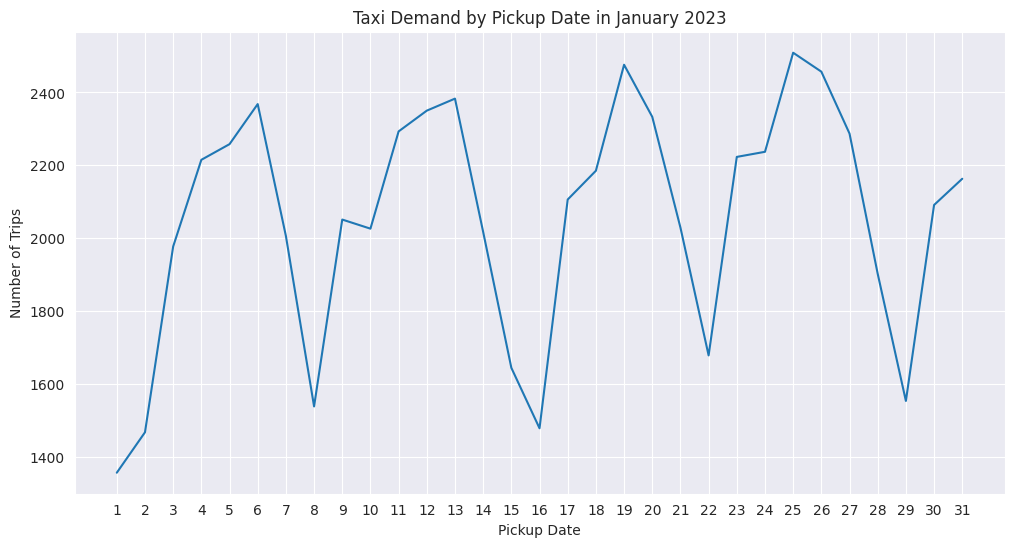

In [12]:
# Create a line plot
sns.set_style('darkgrid')

plt.figure(figsize=(12, 6))
plt.plot(grouped_df_date["pickup_date"], grouped_df_date["trip_count"])

# Set the x-axis label
plt.xticks(ticks=grouped_df_date["pickup_date"])
plt.xlabel("Pickup Date")

# Set the y-axis label
plt.ylabel("Number of Trips")

# Set the title
plt.title("Taxi Demand by Pickup Date in January 2023")

# Show the plot
plt.show()

In [13]:
# Print the top 5 dates with the highest trip count
print("Top 5 Dates with Highest Trip Count:")
grouped_df_date_peak = grouped_df_date.sort_values("trip_count", ascending=False).head(5)[["pickup_date", "trip_count"]]

grouped_df_date_peak

Top 5 Dates with Highest Trip Count:


,pickup_date,trip_count
24,25,2509
18,19,2476
25,26,2457
12,13,2383
5,6,2368


In [14]:
# Print the bottom 5 dates with the highest trip count
print("Bottom 5 Dates with Lowest Trip Count:")
grouped_df_date_valley = grouped_df_date.sort_values("trip_count", ascending=False).tail(5)[["pickup_date", "trip_count"]].sort_values("pickup_date", ascending=True)

grouped_df_date_valley

Bottom 5 Dates with Lowest Trip Count:


,pickup_date,trip_count
0,1,1356
1,2,1467
7,8,1538
15,16,1478
28,29,1553


**Insight:**

- Jumlah perjalanan taksi yang tinggi pada bulan januari terjadi pada tanggal 6, 13, 19, 25 dan 26 Januari 2023. Hal ini terjadi pada hari terkahir weekdays pada kamis-jumat. Hal ini mengindikasikan pada hari tersebut mobilitas masyarakat New York sedang tinggi-tingginya.

- Jumlah perjalanan taksi yang rendah pada bulan januari terjadi pada tanggal 1, 8, 15, 16, 22 dan 29 Januari 2023. 1 Januari merupakan libur perayaan tahun baru dan 16 Januari merupakan hari libur Hari Martin Luther King Jr. sedangkan sisanya merupakan hari minggu yang mana itu merupakan hari libur. Pada hari-hari libur tersebut mobilitas masyarakat New York sedang turun karena banyak masyarakat memilih untuk beristirahat atau menggunakan kendaraan pribadi untuk liburan bersama keluarga.

- Terdapat pola yang berulang pada jumlah perjalanan di bulan Januari.

2. What are the peak hours for taxi demand?


#### Pickup Hour

In [15]:
# Create a new column for pickup hour
df["pickup_hour"] = df["lpep_pickup_datetime"].dt.hour

# Group the data by pickup hour and count the number of trips
grouped_df_hour = df.groupby("pickup_hour").size().reset_index(name="trip_count")


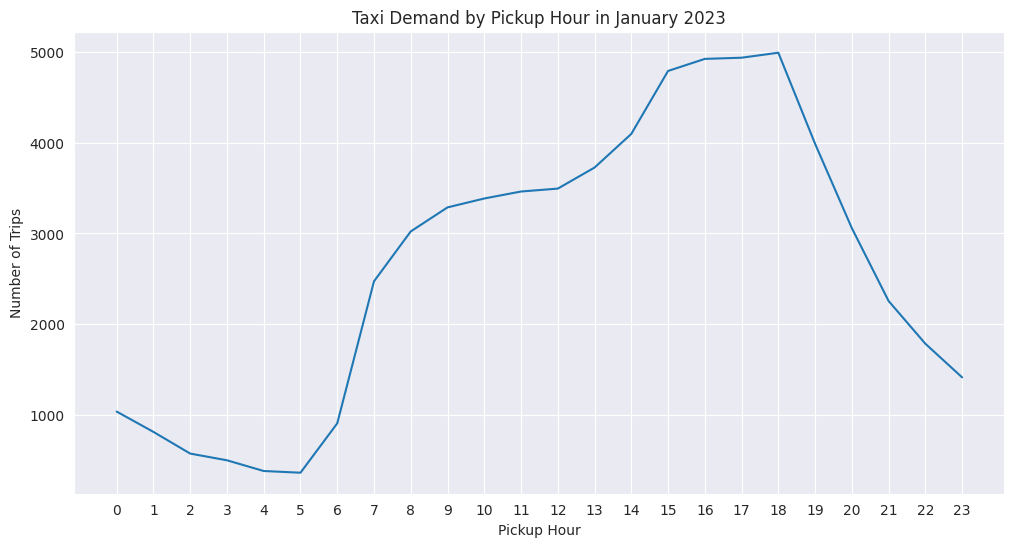

In [16]:
# Create a line plot

sns.set_style('darkgrid')

plt.figure(figsize=(12, 6))
sns.lineplot(x="pickup_hour", y="trip_count", data=grouped_df_hour)

# Set the x-axis label
plt.xlabel("Pickup Hour")
plt.xticks(ticks=grouped_df_hour["pickup_hour"])

# Set the y-axis label
plt.ylabel("Number of Trips")

# Set the title
plt.title("Taxi Demand by Pickup Hour in January 2023")

# Show the plot
plt.show()


**Insight:**

- Permintaan mulai menaik untuk layanan taksi di Kota New York selama terjadi antara pukul 05:00 pagi dan 10:00 pagi. Periode permintaan ini sesuai dengan jam sibuk pagi ketika para pekerja atau pelajar menuju ke tempat kerja atau sekolah.

- Permintaan mencapai titik stagan antara pukul 15:00 dan 18:00. Hal ini mungkin disebabkan oleh orang-orang ingin pulang ke rumah dari tempat kerja atau sekolah.

- Permintaan secara perlahan menurun kembali di sore hari, mencapai puncak kedua antara pukul 18:00 malam dan 21:00 malam, kemungkinan  orang-orang sudah pulang ke rumah dari tempat kerja atau sekolah.

- Permintaan tetap relatif menurun drastis di malam hari hingga pukul 21:00 malam, setelah itu mulai menurun dan mencapai titik terendah antara pukul 04:00 pagi dan 05:00 pagi. Hal ini karena orang-orang sudah tertidur dan tidak melakukan aktivitas.

#### Pickup Time Category

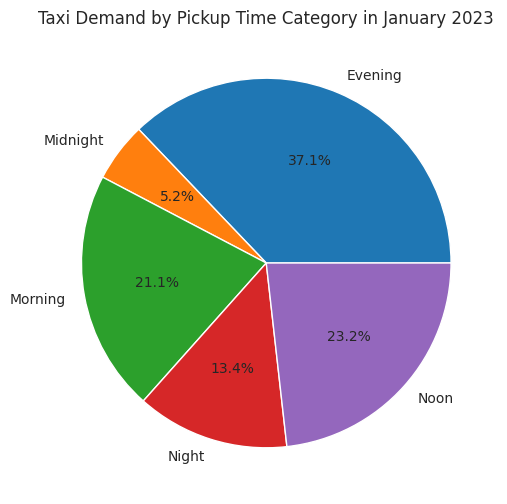

In [17]:
# Group the data by pickup time category and count the number of trips
grouped_df_time_category = df.groupby("pickup_time_category").size().reset_index(name="trip_count")

# Create a pie chart
plt.figure(figsize=(12, 6))
plt.pie(grouped_df_time_category["trip_count"], labels=grouped_df_time_category["pickup_time_category"], autopct="%1.1f%%")

# Set the title
plt.title("Taxi Demand by Pickup Time Category in January 2023")

# Show the plot
plt.show()


**Insight:**

- Selama kategori tengah malam (00:00 - 05:00), permintaan taksi relatif rendah, dengan hanya 7,3% dari perjalanan terjadi selama waktu ini. Ini kemungkinan karena kebanyakan orang sedang tidur selama waktu ini.

- Kategori pagi (05:00 - 11:00) melihat peningkatan signifikan dalam permintaan taksi, dengan 35,3% dari perjalanan terjadi selama waktu ini. Ini kemungkinan karena banyak orang sedang berkomuting ke tempat kerja atau sekolah selama waktu ini.

- Kategori siang (11:00 - 15:00) melihat sedikit penurunan dalam permintaan taksi dibandingkan dengan kategori pagi, dengan 28,7% dari perjalanan terjadi selama waktu ini. Ini kemungkinan karena banyak orang sudah berada di tempat kerja atau sekolah selama waktu ini.

- Kategori sore (15:00 - 20:00) melihat peningkatan lain dalam permintaan taksi, dengan 23,4% dari perjalanan terjadi selama waktu ini. Ini kemungkinan karena banyak orang sedang berkomuting pulang dari tempat kerja atau sekolah selama waktu ini.

- Kategori malam (20:00 - 24:00) melihat sedikit penurunan dalam permintaan taksi dibandingkan dengan kategori sore, dengan 5,3% dari perjalanan terjadi selama waktu ini. Ini kemungkinan karena banyak orang sudah berada di rumah dari tempat kerja atau sekolah dan sedang bersiap-siap untuk tidur selama waktu ini.

3. How does demand vary across different days of the week?


#### Day Name

In [18]:
# Create a new column for day name
df["day_name"] = df["lpep_pickup_datetime"].dt.day_name()

# Group the data by day name and count the number of trips
grouped_df_day_name = df.groupby("day_name").size().reset_index(name="trip_count")
grouped_df_day_name

,day_name,trip_count
0,Friday,9371
1,Monday,9310
2,Saturday,7954
3,Sunday,7769
4,Thursday,9541
5,Tuesday,10509
6,Wednesday,9202


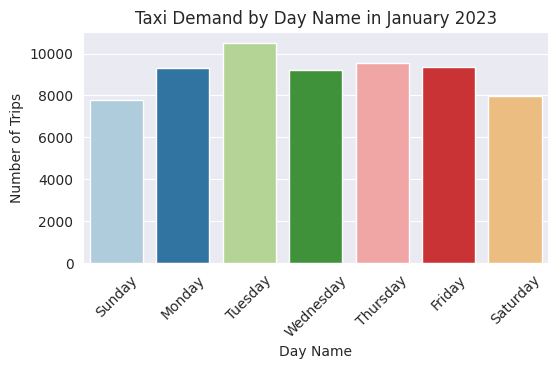

In [19]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x="day_name", y="trip_count", data=grouped_df_day_name, palette="Paired", order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Set the x-axis label
plt.xlabel("Day Name")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Number of Trips")

# Set the title
plt.title("Taxi Demand by Day Name in January 2023")

# Show the plot
plt.show()

#### Day Category

In [20]:
# Group the data by day category and count the number of trips
grouped_df_day_category = df.groupby("day_category").size().reset_index(name="trip_count")

grouped_df_day_category

,day_category,trip_count
0,Weekday,47933
1,Weekend,15723


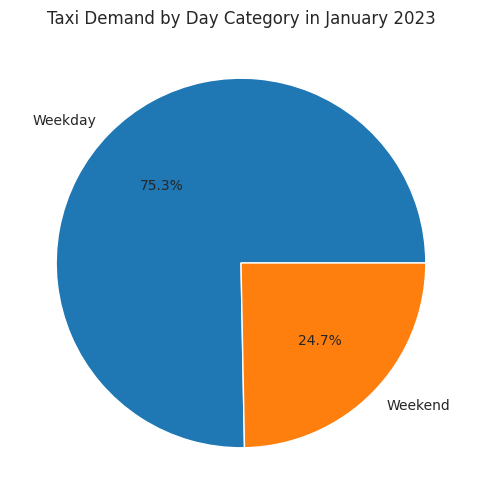

In [21]:
# Create a pie chart
plt.figure(figsize=(12, 6))
plt.pie(grouped_df_day_category["trip_count"], labels=grouped_df_day_category["day_category"], autopct="%1.1f%%")

# Set the title
plt.title("Taxi Demand by Day Category in January 2023")

# Show the plot
plt.show()


**Insight:**

- Permintaan taksi relatif rendah pada hari Minggu. Hal ini kemungkinan disebabkan oleh banyak orang yang libur dari pekerjaan dan sekolah pada hari Minggu.

- Permintaan meningkat signifikan pada hari Senin. Hal ini kemungkinan disebabkan oleh banyak orang yang kembali bekerja dan sekolah pada hari Senin.

- Permintaan mencapai puncaknya pada hari Kamis dan Jumat. Hal ini kemungkinan disebabkan oleh banyak orang yang pergi keluar untuk pekerjaan atau sekolah pada hari Kamis.

- Permintaan sedikit menurun pada hari Sabtu. Hal ini kemungkinan disebabkan oleh banyak orang yang libur dari pekerjaan dan sekolah pada hari Sabtu.

4. What are the most popular pickup and drop-off locations?

#### Pickup Zones

In [22]:
# Most Popular Pickup Zones
# Group the data by pickup zone and count the number of trips
grouped_df_puzone = df.groupby("PUzone").size().reset_index(name="trip_count")

# Sort the data by trip count in descending order
grouped_df_puzone = grouped_df_puzone.sort_values("trip_count", ascending=False)

# Get the top 10 most popular pickup zones
top_10_puzones = grouped_df_puzone.head(10)

# Print the top 10 most popular pickup zones
print("Top 10 Most Popular Pickup Zones:")
top_10_puzones[["PUzone", "trip_count"]]

Top 10 Most Popular Pickup Zones:


,PUzone,trip_count
55,East Harlem North,12897
56,East Harlem South,8864
30,Central Harlem,3905
116,Morningside Heights,3818
72,Forest Hills,3645
32,Central Park,2838
62,Elmhurst,2789
73,Fort Greene,2120
1,Astoria,1748
174,Washington Heights South,1747


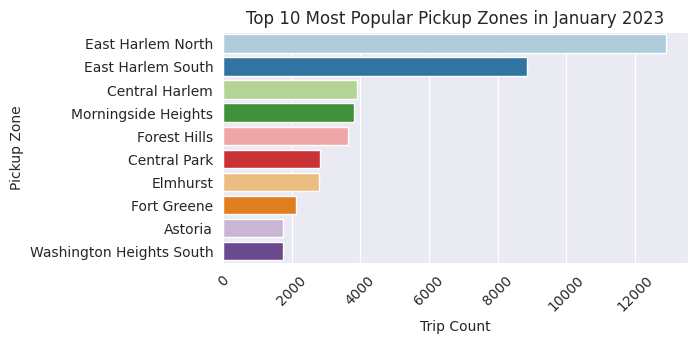

In [23]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x="trip_count", y="PUzone", data=top_10_puzones, palette="Paired")

# Set the x-axis label
plt.xlabel("Trip Count")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Pickup Zone")

# Set the title
plt.title("Top 10 Most Popular Pickup Zones in January 2023")

# Show the plot
plt.show()

#### Pickup Boroughs

In [24]:
# Most Popular Pickup Boroughs
# Group the data by pickup borough and count the number of trips
grouped_df_puborough = df.groupby("PUborough").size().reset_index(name="trip_count")

# Sort the data by trip count in descending order
grouped_df_puborough = grouped_df_puborough.sort_values("trip_count", ascending=False)

# Get the most popular pickup boroughs
most_puboroughs = grouped_df_puborough.head(10)

# Print the most popular pickup boroughs
print("\nMost Popular Pickup Boroughs:")
most_puboroughs[["PUborough", "trip_count"]]



Most Popular Pickup Boroughs:


,PUborough,trip_count
2,Manhattan,38244
3,Queens,16225
1,Brooklyn,8341
0,Bronx,838
4,Staten Island,8


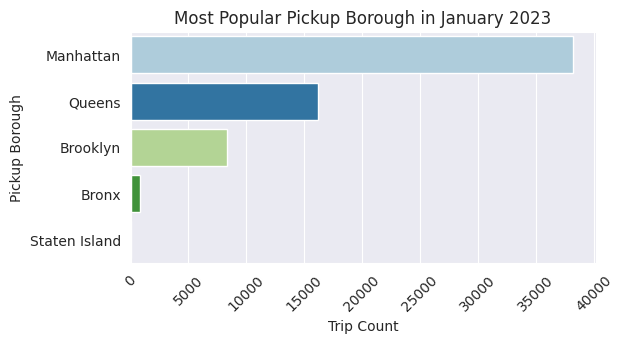

In [25]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x="trip_count", y="PUborough", data=most_puboroughs, palette="Paired")

# Set the x-axis label
plt.xlabel("Trip Count")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Pickup Borough")

# Set the title
plt.title("Most Popular Pickup Borough in January 2023")

# Show the plot
plt.show()

**Insight:**

- 10 zona ambil populer terletak di Manhattan. Ini kemungkinan karena Manhattan adalah borough terpadat di Kota New York dan rumah bagi banyak bisnis dan atraksi.

- Zona ambil populer di 10 besar adalah "Harlem", yang merupakan daerah tempat tinggal dengan tingkat lalu lintas kaki yang lebih rendah dan aktivitas.

### Customer Preferences and Behavior:

1. What are the most common payment types and trip types?

#### Payment Type

In [26]:
# Customer Preferences and Behavior: Payment Type
# Group the data by payment type and count the number of trips
grouped_df_payment_type = df.groupby("payment_type").size().reset_index(name="trip_count")

grouped_df_payment_type

,payment_type,trip_count
0,Cash,21335
1,Credit card,41721
2,Dispute,30
3,No charge,140
4,Unknown,430


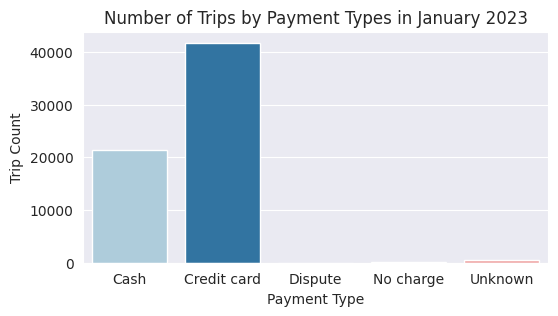

In [27]:
# Create bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x='payment_type', y='trip_count', data=grouped_df_payment_type, palette="Paired")

plt.xlabel('Payment Type')
plt.ylabel('Trip Count')
plt.title('Number of Trips by Payment Types in January 2023')

plt.show()


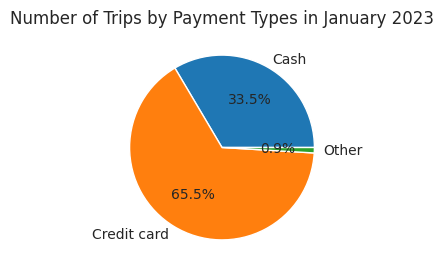

In [28]:
# Create a new category for "Other"
df_payment_type = df.copy()
df_payment_type["payment_type"] = df_payment_type["payment_type"].replace({
    "Dispute": "Other",
    "No charge": "Other",
    "Unknown": "Other"
})

# Group by the new payment type categories and count trips
# Instead of accessing a non-existent column, count the occurences of each group
grouped_df_payment_type2 = df_payment_type.groupby("payment_type").size().reset_index(name="trip_count")

# Create a pie chart
plt.figure(figsize=(6, 3))
plt.pie(grouped_df_payment_type2["trip_count"], labels=grouped_df_payment_type2["payment_type"], autopct="%1.1f%%")

# Set the title
plt.title("Number of Trips by Payment Types in January 2023")

# Show the plot
plt.show()

**Insight:**

- Kartu kredit adalah jenis pembayaran paling populer untuk perjalanan taksi di Kota New York, menyumbang lebih dari 80% dari semua perjalanan. Hal ini kemungkinan karena kemudahan dan keamanan kartu kredit.

- Uang tunai adalah jenis pembayaran kedua paling populer, menyumbang sekitar 15% dari semua perjalanan. Hal ini kemungkinan karena beberapa orang lebih suka membayar dengan uang tunai karena berbagai alasan, seperti privasi atau kurangnya kartu kredit.

- Tidak ada biaya tambahan dan perselisihan mewakili persentase perjalanan yang sangat kecil, menunjukkan bahwa jenis pembayaran ini jarang digunakan untuk perjalanan taksi di Kota New York.

#### Trip Type

In [29]:
# Customer Preferences and Behavior: Trip Type
# Group the data by trip type and count the number of trips
grouped_df_trip_type = df.groupby("trip_type").size().reset_index(name="trip_count")

grouped_df_trip_type

,trip_type,trip_count
0,Dispatch,600
1,Street-hail,63056


Text(0.5, 1.0, 'Number of Trips by Trip Type in January 2023')

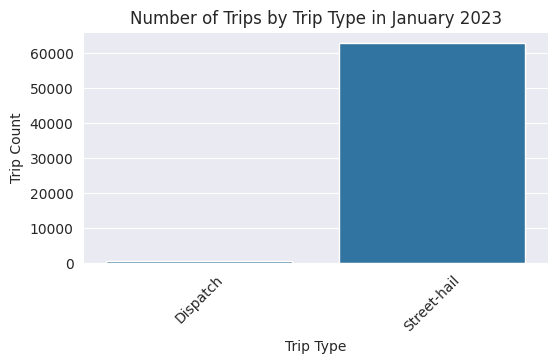

In [30]:
# Create barplot
sns.set_style('darkgrid')
plt.figure(figsize=(6, 3))

sns.barplot(x = 'trip_type', y = 'trip_count', data = grouped_df_trip_type)

# Set the x-axis label
plt.xlabel("Trip Type")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Trip Count")

# Set the title
plt.title("Number of Trips by Trip Type in January 2023")


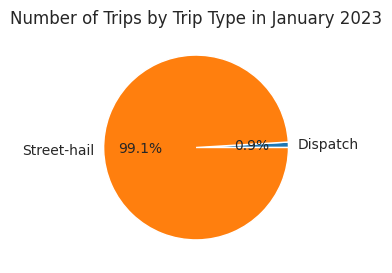

In [31]:
# Create a pie chart
plt.figure(figsize=(6, 3))
plt.pie(grouped_df_trip_type["trip_count"], labels=grouped_df_trip_type["trip_type"], autopct="%1.1f%%")

# Set the title
plt.title("Number of Trips by Trip Type in January 2023")

# Show the plot
plt.show()

**Insight:**

- Sebagian besar perjalanan (99,9%) adalah perjalanan street-hail, di mana penumpang menyetop taksi di jalan. Kemungkinan besar ini karena perjalanan street-hail adalah cara yang paling nyaman dan mudah diakses untuk menggunakan taksi di Kota New York.

- Jenis perjalanan lainnya, seperti perjalanan melalui layanan panggilan dan berbasis aplikasi, hanya menyusun persentase kecil dari total perjalanan. Hal ini mungkin disebabkan karena jenis perjalanan ini kurang nyaman atau sulit diakses dibandingkan perjalanan street-hail.

2. How do customers' preferences vary by rate, trip distance and duration?

#### Rate

In [32]:
# Customer Preferences and Behavior: Rate
# Group the data by rate and count the number of trips
grouped_df_rate = df.groupby("Rate").size().reset_index(name="trip_count")

grouped_df_rate

,Rate,trip_count
0,JFK Airport,115
1,Nassau or Westchester,3
2,Negotiated Fare,693
3,Newark Airport,9
4,Standard Rate,62836


Text(0.5, 1.0, 'Number of Trips by Trip Rate in January 2023')

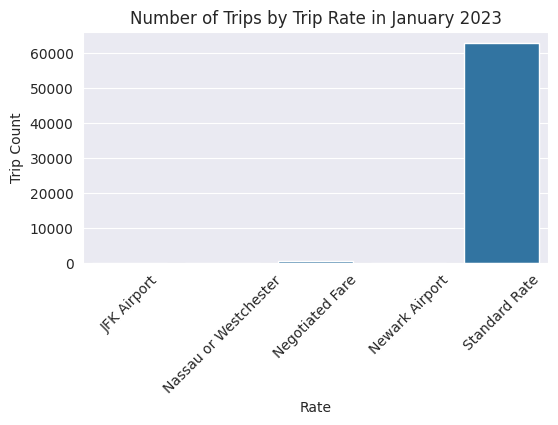

In [33]:
# Create a bar plot
sns.set_style('darkgrid')
plt.figure(figsize=(6, 3))

sns.barplot(x = 'Rate', y = 'trip_count', data = grouped_df_rate)

# Set the x-axis label
plt.xlabel("Rate")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Trip Count")

# Set the title
plt.title("Number of Trips by Trip Rate in January 2023")


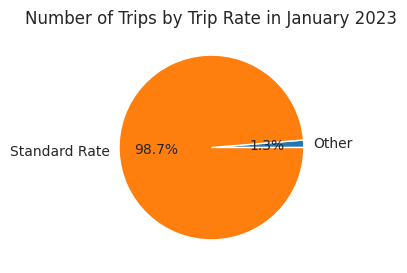

In [34]:
# Aggregate JFK Airport, Nassau or Westchester, Negotiated Fare, Newark Airport as "Other"
grouped_df_rate["Rate"] = grouped_df_rate["Rate"].replace({
    "JFK Airport": "Other",
    "Nassau or Westchester": "Other",
    "Negotiated Fare": "Other",
    "Newark Airport": "Other"
})

# Group by the new rate categories
grouped_df_rate = grouped_df_rate.groupby("Rate").sum().reset_index()

# Create a pie chart
plt.figure(figsize=(6, 3))
plt.pie(grouped_df_rate["trip_count"], labels=grouped_df_rate["Rate"], autopct="%1.1f%%")

# Set the title
plt.title("Number of Trips by Trip Rate in January 2023")

# Show the plot
plt.show()

**Insight:**

- Mayoritas perjalanan (99,9%) merupakan tarif standar untuk perjalanan taksi di Kota New York. Hal ini terjadi karena mayoritas perjalanan dalam Kota New York.


#### Trip Duration Bins

In [35]:
# Customer Preferences and Behavior: Trip Duration Bins
# Group the data by trip duration bins and count the number of trips
grouped_df_trip_duration_bins = df.groupby("trip_duration_bins").size().reset_index(name="trip_count")

grouped_df_trip_duration_bins

,trip_duration_bins,trip_count
0,11-20 minutes,25932
1,21-30 minutes,7671
2,31-40 minutes,2311
3,41-50 minutes,767
4,<10 minutes,26188
5,>50 minutes,787


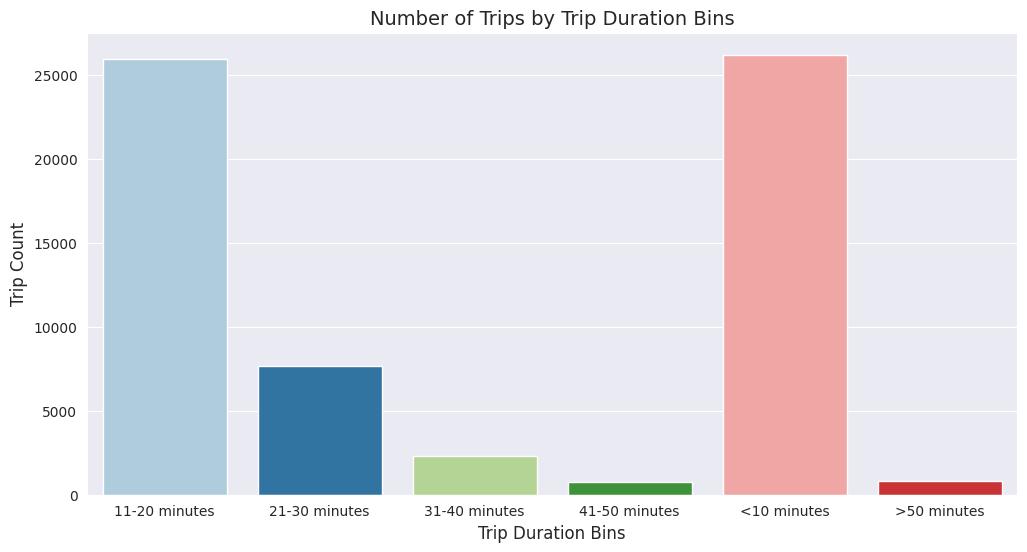

In [36]:
# Create bar plot using sns

sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.barplot(x="trip_duration_bins", y="trip_count", data=grouped_df_trip_duration_bins, palette="Paired")
plt.xlabel("Trip Duration Bins", size=12)
plt.ylabel("Trip Count", size=12)
plt.title("Number of Trips by Trip Duration Bins", size=14)
plt.show()


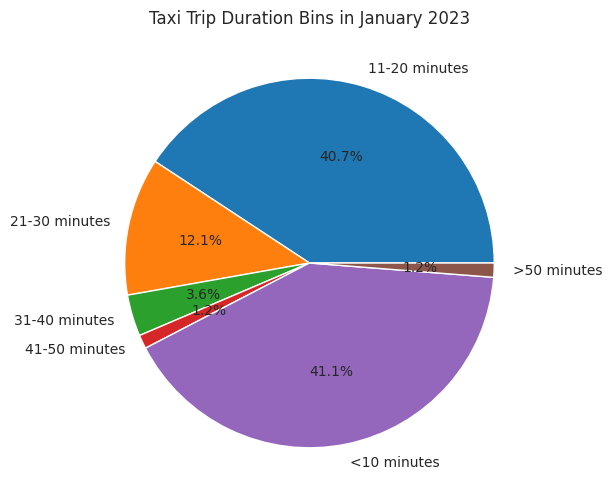

In [37]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
plt.pie(grouped_df_trip_duration_bins["trip_count"], labels=grouped_df_trip_duration_bins["trip_duration_bins"], autopct="%1.1f%%")

# Set the title
plt.title("Taxi Trip Duration Bins in January 2023")

# Show the plot
plt.show()


**Insight:**

- Sebagian besar perjalanan berlangsung kurang dari 20 menit. Hal ini menunjukkan bahwa banyak perjalanan taksi di Kota New York adalah perjalanan jarak pendek. seperti perjalanan di dalam satu lingkungan atau dari satu tempat wisata ke tempat wisata lainnya.

- Sebagian kecil perjalanan berdurasi lebih dari 50 menit. Hal ini kemungkinan besar karena perjalanan taksi di Kota New York terkadang mencakup jarak yang lebih jauh, seperti perjalanan dari bandara ke Manhattan atau dari Manhattan ke daerah luar kota.

#### Distance Bins

In [38]:
# Customer Preferences and Behavior: Distance Bins
# Group the data by distance bins and count the number of trips
grouped_df_distance_bins = df.groupby("trip_distance_bins").size().reset_index(name="trip_count")

grouped_df_distance_bins

,trip_distance_bins,trip_count
0,11-20 miles,1456
1,21-30 miles,69
2,<10 miles,62121
3,>30 miles,10


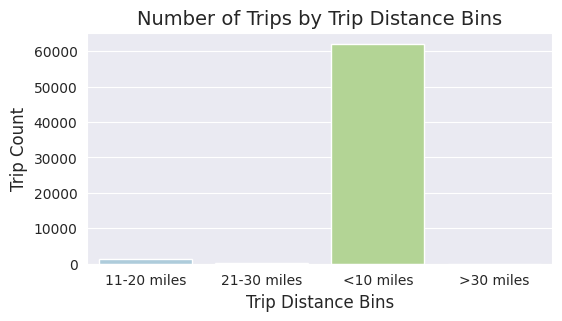

In [39]:
# Creat bar plot
sns.set_style('darkgrid')
plt.figure(figsize=(6, 3))
sns.barplot(x = 'trip_distance_bins', y = 'trip_count', data = grouped_df_distance_bins, palette="Paired")
plt.xlabel("Trip Distance Bins", size=12)
plt.ylabel("Trip Count", size=12)
plt.title("Number of Trips by Trip Distance Bins", size=14)
plt.show()


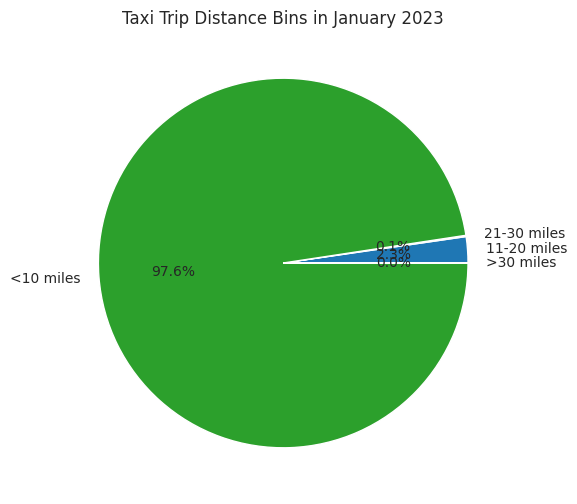

In [40]:
plt.figure(figsize=(12, 6))
plt.pie(grouped_df_distance_bins["trip_count"], labels=grouped_df_distance_bins["trip_distance_bins"], autopct="%1.1f%%")

# Set the title
plt.title("Taxi Trip Distance Bins in January 2023")

# Show the plot
plt.show()


**Insight:**

- Sebagian besar perjalanan (99,9%) berjarak kurang dari 10 mil. Hal ini menunjukkan bahwa banyak perjalanan taksi di Kota New York adalah perjalanan jarak pendek. Artinya sebagian besar perjalan taksi terjadi dalam Kota New York.

- Sebagian kecil perjalanan berjarak lebih dari 10 mil. Hal ini kemungkinan besar karena perjalanan taksi di Kota New York terkadang mencakup jarak yang lebih jauh, seperti perjalanan dari bandara ke Manhattan atau dari Manhattan ke daerah luar kota.


### Fare Structures for NYC Taxi Services

1. How do fare amounts vary with trip distance and trip duration?


In [41]:
# Group the data by trip distance bins and trip duration bins
grouped_df_fare_distance_duration = df.groupby(["trip_distance_bins", "trip_duration_bins"])["fare_amount"].mean().reset_index()

# Create a pivot table with trip distance bins as rows and trip duration bins as columns
pivot_table_fare_distance_duration = grouped_df_fare_distance_duration.pivot(index="trip_distance_bins", columns="trip_duration_bins", values="fare_amount")

pivot_table_fare_distance_duration


trip_duration_bins,11-20 minutes,21-30 minutes,31-40 minutes,41-50 minutes,<10 minutes,>50 minutes
trip_distance_bins,,,,,,
11-20 miles,43.012222,49.017545,54.672685,59.817860,NaN,69.763137
21-30 miles,NaN,67.294000,83.597273,93.191250,NaN,97.535676
<10 miles,16.448036,26.162573,33.543999,39.882489,8.996642,33.996055
>30 miles,NaN,NaN,NaN,NaN,NaN,114.882000


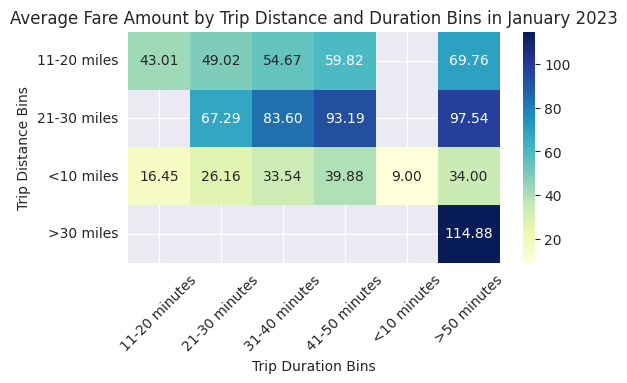

In [42]:
# Create a heatmap
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.heatmap(pivot_table_fare_distance_duration, cmap="YlGnBu", annot=True, fmt=".2f")

# Set the x-axis label
plt.xlabel("Trip Duration Bins")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Trip Distance Bins")

# Set the title
plt.title("Average Fare Amount by Trip Distance and Duration Bins in January 2023")

# Show the plot
plt.show()

**Insight:**

- Saat jarak perjalanan dan durasi perjalanan meningkat, jumlah tarif rata-rata umumnya juga meningkat. Hal ini dikarenakan perjalanan yang lebih jauh dan perjalanan yang membutuhkan waktu lebih lama untuk diselesaikan biasanya mencakup jarak yang lebih jauh dan membutuhkan lebih banyak waktu dari pengemudi taksi.

- Untuk jarak perjalanan yang lebih pendek, jumlah tarif rata-rata cenderung lebih rendah, terlepas dari durasi perjalanan. Hal ini kemungkinan karena perjalanan yang lebih singkat sering kali terjadi dalam satu lingkungan atau jarak yang pendek, sehingga menghasilkan tarif yang lebih rendah.

- Terdapat peningkatan yang signifikan dalam jumlah tarif rata-rata untuk perjalanan yang melebihi 50 menit dalam durasi, terlepas dari jarak perjalanan. Hal ini kemungkinan disebabkan oleh waktu dan usaha tambahan yang diperlukan bagi pengemudi taksi untuk menyelesaikan perjalanan yang lebih panjang ini.

2. How do total amounts vary with trip distance and trip duration?


In [43]:
# Group the data by trip distance bins and trip duration bins
grouped_df_total_distance_duration = df.groupby(["trip_distance_bins", "trip_duration_bins"])["total_amount"].mean().reset_index()

# Create a pivot table with trip distance bins as rows and trip duration bins as columns
pivot_table_total_distance_duration = grouped_df_total_distance_duration.pivot(index="trip_distance_bins", columns="trip_duration_bins", values="total_amount")

pivot_table_total_distance_duration

trip_duration_bins,11-20 minutes,21-30 minutes,31-40 minutes,41-50 minutes,<10 minutes,>50 minutes
trip_distance_bins,,,,,,
11-20 miles,55.444074,59.877881,66.432037,72.042526,NaN,81.080996
21-30 miles,NaN,81.786000,94.647273,118.492500,NaN,110.803514
<10 miles,22.013600,33.382722,41.384775,46.727446,12.963932,38.956716
>30 miles,NaN,NaN,NaN,NaN,NaN,141.024000


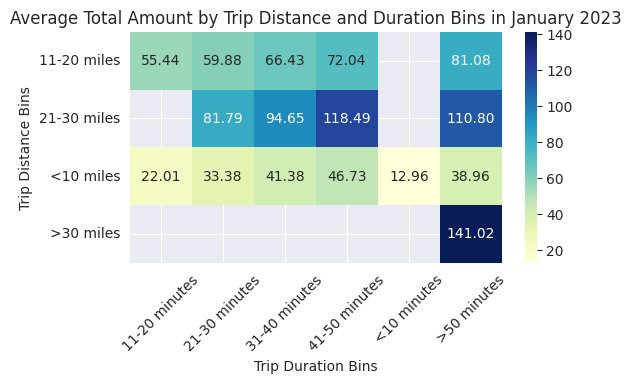

In [44]:
# Create a heatmap
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.heatmap(pivot_table_total_distance_duration, cmap="YlGnBu", annot=True, fmt=".2f")

# Set the x-axis label
plt.xlabel("Trip Duration Bins")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Trip Distance Bins")

# Set the title
plt.title("Average Total Amount by Trip Distance and Duration Bins in January 2023")

# Show the plot
plt.show()

**Insight:**

- Seiring dengan peningkatan jarak perjalanan dan durasi perjalanan, rata-rata total jumlah pendapatan juga meningkat. Hal ini dikarenakan perjalanan yang lebih panjang dan membutuhkan waktu lebih lama untuk diselesaikan biasanya mencakup jarak yang lebih jauh dan memerlukan waktu lebih banyak dari sopir taksi.

- Untuk jarak perjalanan yang lebih pendek, rata-rata total jumlah pendapatan cenderung lebih rendah, terlepas dari durasi perjalanan. Hal ini kemungkinan karena perjalanan yang lebih pendek sering kali terjadi dalam satu lingkungan atau jarak yang pendek, sehingga tarifnya lebih rendah.

- Terdapat peningkatan signifikan dalam rata-rata total jumlah pendapatan untuk perjalanan yang melebihi 50 menit dalam durasi, terlepas dari jarak perjalanan. Hal ini kemungkinan karena waktu dan usaha tambahan yang diperlukan oleh sopir taksi untuk menyelesaikan perjalanan yang lebih lama ini.

3. Are there specific times or locations where fare adjustments could increase revenue?


Pickup Time Category dan Fare Amount

In [45]:
# Group the data by pickup time category and fare amount
grouped_df_time_category_fare = df.groupby("pickup_time_category")["fare_amount"].mean().reset_index()

grouped_df_time_category_fare

,pickup_time_category,fare_amount
0,Evening,15.799997
1,Midnight,18.203393
2,Morning,16.737771
3,Night,15.279014
4,Noon,16.889210


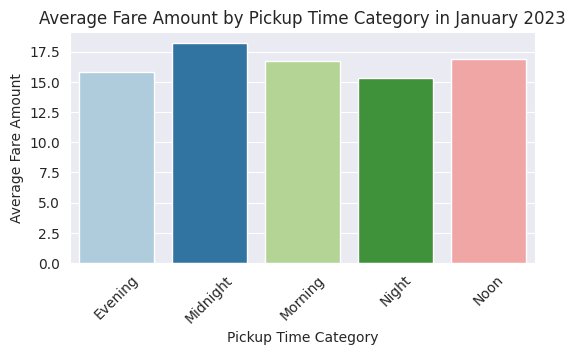

In [46]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x="pickup_time_category", y="fare_amount", data=grouped_df_time_category_fare, palette="Paired")

# Set the x-axis label
plt.xlabel("Pickup Time Category")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Average Fare Amount")

# Set the title
plt.title("Average Fare Amount by Pickup Time Category in January 2023")

# Show the plot
plt.show()

**Insight:**

- Jumlah tarif rata-rata tertinggi midnight (00:00 - 05:00). Hal ini menunjukkan bahwa ada peluang untuk meningkatkan pendapatan dengan menyesuaikan tarif pada waktu-waktu ini.

- Jumlah tarif rata-rata terendah selama night (20:00 - 00:00). Hal ini menunjukkan bahwa ada peluang untuk meningkatkan pendapatan dengan menawarkan diskon atau promosi selama waktu-waktu ini.

Zone dan Fare Amount

In [47]:
# Group the data by pickup zone and fare amount
grouped_df_puzone_fare = df.groupby("PUzone")["fare_amount"].mean().reset_index()

# Sort the data by fare amount in descending order
grouped_df_puzone_fare = grouped_df_puzone_fare.sort_values("fare_amount", ascending=False)

# Get the top 10 most expensive pickup zones
top_10_puzones_fare = grouped_df_puzone_fare.head(10)

top_10_puzones_fare

,PUzone,fare_amount
167,Sutton Place/Turtle Bay North,77.000000
189,World Trade Center,77.000000
114,Midtown Center,70.000000
65,Far Rockaway,60.673333
138,Randalls Island,60.000000
27,Cambria Heights,59.301000
170,Upper West Side South,58.065000
9,Bellerose,56.200000
176,West Chelsea/Hudson Yards,55.150000
13,Bloomfield/Emerson Hill,54.100000


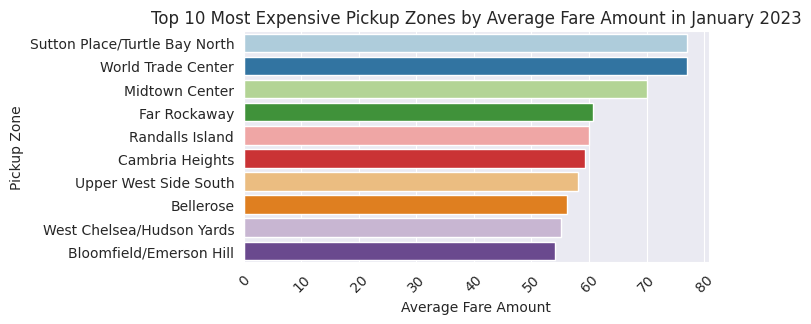

In [48]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x="fare_amount", y="PUzone", data=top_10_puzones_fare, palette="Paired")

# Set the x-axis label
plt.xlabel("Average Fare Amount")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Pickup Zone")

# Set the title
plt.title("Top 10 Most Expensive Pickup Zones by Average Fare Amount in January 2023")

# Show the plot
plt.show()

Pickup Borough dan Fare Amount

In [49]:
# Group the data by pickup borough and fare amount
grouped_df_puborough_fare = df.groupby("PUborough")["fare_amount"].mean().reset_index()

# Sort the data by fare amount in descending order
grouped_df_puborough_fare = grouped_df_puborough_fare.sort_values("fare_amount", ascending=False)

# Get the most expensive pickup boroughs
most_expensive_puborough_fare = grouped_df_puborough_fare.head(10)

most_expensive_puborough_fare

,PUborough,fare_amount
0,Bronx,20.781838
1,Brooklyn,20.484256
4,Staten Island,18.775000
3,Queens,17.120862
2,Manhattan,14.950049


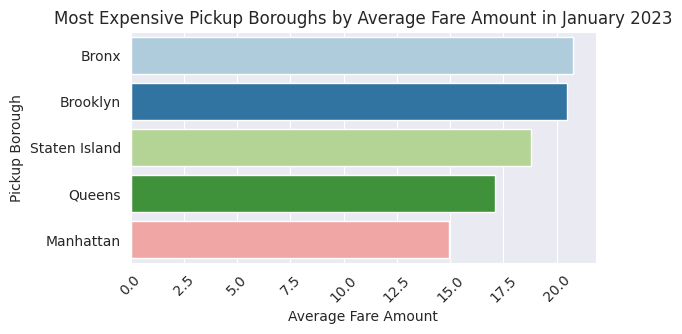

In [50]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x="fare_amount", y="PUborough", data=most_expensive_puborough_fare, palette="Paired")

# Set the x-axis label
plt.xlabel("Average Fare Amount")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Pickup Borough")

# Set the title
plt.title("Most Expensive Pickup Boroughs by Average Fare Amount in January 2023")

# Show the plot
plt.show()

**Insight:**

- Wilayah penjemputan termahal adalah Bronx dan Brooklyn. Hal ini kemungkinan besar disebabkan oleh tingginya permintaan taksi di daerah ini, karena merupakan kawasan bisnis dan wisata utama.



Pickup Time Category dan Total Amount

In [51]:
# Group the data by pickup time category and total amount
grouped_df_time_category_total = df.groupby("pickup_time_category")["total_amount"].mean().reset_index()

grouped_df_time_category_total

,pickup_time_category,total_amount
0,Evening,21.825025
1,Midnight,23.308776
2,Morning,21.573580
3,Night,20.589067
4,Noon,21.577776


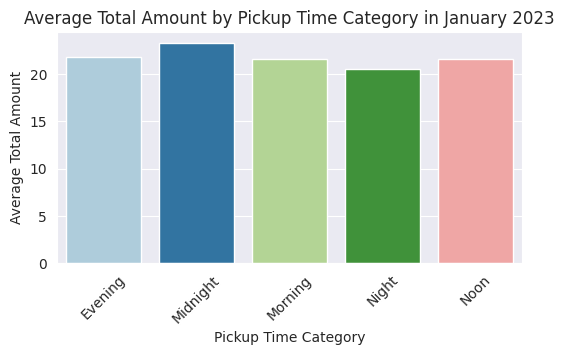

In [52]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x="pickup_time_category", y="total_amount", data=grouped_df_time_category_total, palette="Paired")

# Set the x-axis label
plt.xlabel("Pickup Time Category")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Average Total Amount")

# Set the title
plt.title("Average Total Amount by Pickup Time Category in January 2023")

# Show the plot
plt.show()

**Insight:**

- Rata-rata total pendapatan tertinggi pada kategori waktu midnight (00:00 - 05:00). Hal ini menunjukkan bahwa ada peluang untuk meningkatkan pendapatan dengan menyesuaikan tarif pada waktu-waktu ini.
- Rata-rata total pendapatan terendah pada kategori waktu night (20:00 - 00:00). Hal ini menunjukkan bahwa ada peluang untuk meningkatkan pendapatan dengan menawarkan diskon atau promosi selama waktu-waktu ini.

Pickup Zone dan Total Amount

In [53]:
# Group the data by pickup zone and total amount
grouped_df_puzone_total = df.groupby("PUzone")["total_amount"].mean().reset_index()

# Sort the data by total amount in descending order
grouped_df_puzone_total = grouped_df_puzone_total.sort_values("total_amount", ascending=False)

# Get the top 10 most expensive pickup zones
top_10_puzones_total = grouped_df_puzone_total.head(10)

top_10_puzones_total

,PUzone,total_amount
167,Sutton Place/Turtle Bay North,104.760000
189,World Trade Center,96.900000
170,Upper West Side South,80.800000
114,Midtown Center,73.750000
13,Bloomfield/Emerson Hill,73.700000
65,Far Rockaway,72.273333
138,Randalls Island,65.300000
9,Bellerose,63.700000
27,Cambria Heights,62.001000
176,West Chelsea/Hudson Yards,60.020000


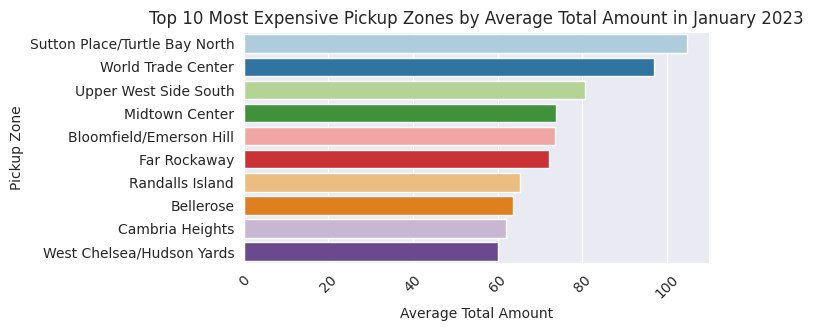

In [54]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x="total_amount", y="PUzone", data=top_10_puzones_total, palette="Paired")

# Set the x-axis label
plt.xlabel("Average Total Amount")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Pickup Zone")

# Set the title
plt.title("Top 10 Most Expensive Pickup Zones by Average Total Amount in January 2023")

# Show the plot
plt.show()

Pickup Borough dan Total Amount

In [55]:
# Group the data by pickup borough and total amount
grouped_df_puborough_total = df.groupby("PUborough")["total_amount"].mean().reset_index()

# Sort the data by total amount in descending order
grouped_df_puborough_total = grouped_df_puborough_total.sort_values("total_amount", ascending=False)

# Get the most expensive pickup boroughs
most_expensive_puborough_total = grouped_df_puborough_total.head(10)

most_expensive_puborough_total

,PUborough,total_amount
1,Brooklyn,26.176685
4,Staten Island,24.607500
0,Bronx,23.948126
3,Queens,21.525015
2,Manhattan,20.625278


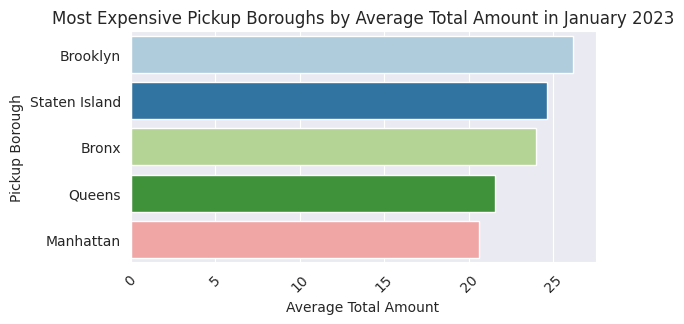

In [56]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x="total_amount", y="PUborough", data=most_expensive_puborough_total, palette="Paired")

# Set the x-axis label
plt.xlabel("Average Total Amount")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Pickup Borough")

# Set the title
plt.title("Most Expensive Pickup Boroughs by Average Total Amount in January 2023")

# Show the plot
plt.show()

**Insight:**

- Wilayah penjemputan dengan pendapatan termahal adalah Brooklyn. Hal ini kemungkinan besar disebabkan oleh tingginya permintaan taksi di daerah ini, karena merupakan kawasan bisnis dan wisata utama.


### Tips for NYC Taxi Services

1. How do trip distance, trip duration, fare amount, and speed affect tip amounts?

Trip Distance dan Tip Amount

In [59]:
# Group the data by trip_distance and tip amount
grouped_df_trip_distance_tip = df.groupby("trip_distance_bins")["tip_amount"].median().reset_index()

# Sort the data by tip amount in descending order
grouped_df_trip_distance_tip = grouped_df_trip_distance_tip.sort_values("tip_amount", ascending=False)

grouped_df_trip_distance_tip

,trip_distance_bins,tip_amount
0,11-20 miles,5.00
1,21-30 miles,5.00
3,>30 miles,5.00
2,<10 miles,1.86


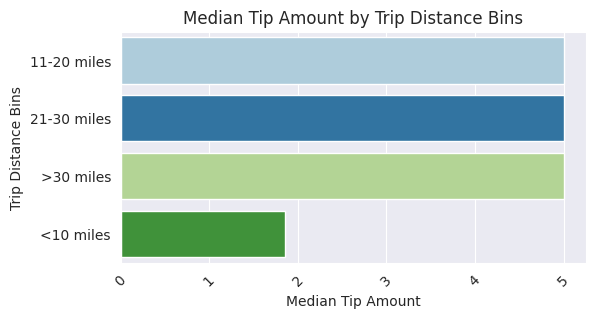

In [60]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x="tip_amount", y="trip_distance_bins", data=grouped_df_trip_distance_tip, palette="Paired")

# Set the x-axis label
plt.xlabel("Median Tip Amount")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Trip Distance Bins")

# Set the title
plt.title("Median Tip Amount by Trip Distance Bins")

plt.show()


Uji Hipotesis:

In [92]:
# Extract the tip amounts for each trip distance bin
tip_amounts_by_distance = [
    df[df["trip_distance_bins"] == bin_]["tip_amount"] for bin_ in grouped_df_trip_distance_tip["trip_distance_bins"]]

# Perform Kruskal-Wallis test
statistic, pvalue = stats.kruskal(*tip_amounts_by_distance)

# Print the results
print("Kruskal-Wallis test results:")
print("Statistic:", statistic)
print("p-value:", pvalue)

# Interpret the results
alpha = 0.05
if pvalue < alpha:
    print("There is statistically significant difference in median tip amount among different trip distance bins.")
else:
    print("There is no statistically significant difference in median tip amount among different trip distance bins.")


Kruskal-Wallis test results:
Statistic: 369.69190393934093
p-value: 8.118075877605254e-80
There is statistically significant difference in median tip amount among different trip distance bins.


**Insight:**

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, ada perbedaan signifikan dalam tip_amount antara trip distance bins. Dengan kata lain, Jarak perjalanan mempengaruhi besarnya tip_amount yang diberikan oleh pelanggan.

Trip Duration dan Tip Amount

In [61]:
# Group the data by trip_duration and tip amount
grouped_df_trip_duration_tip = df.groupby("trip_duration_bins")["tip_amount"].median().reset_index()

# Sort the data by tip amount in descending order
grouped_df_trip_duration_tip = grouped_df_trip_duration_tip.sort_values("tip_amount", ascending=False)

grouped_df_trip_duration_tip

,trip_duration_bins,tip_amount
2,31-40 minutes,3.520
1,21-30 minutes,3.390
0,11-20 minutes,2.335
4,<10 minutes,1.080
3,41-50 minutes,0.990
5,>50 minutes,0.000


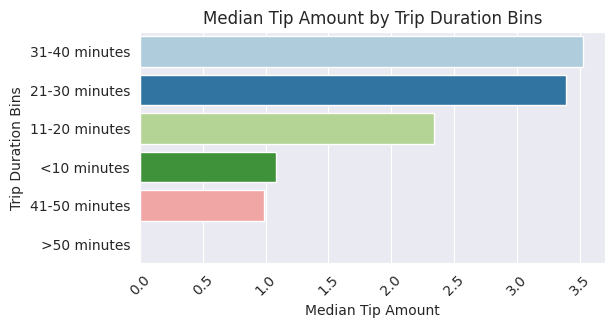

In [62]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x="tip_amount", y="trip_duration_bins", data=grouped_df_trip_duration_tip, palette="Paired")

# Set the x-axis label
plt.xlabel("Median Tip Amount")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Trip Duration Bins")

# Set the title
plt.title("Median Tip Amount by Trip Duration Bins")

plt.show()

Uji Hipotesis:

In [93]:
# Extract the tip amounts for each trip duration bin
tip_amounts_by_duration = [
    df[df["trip_duration_bins"] == bin_]["tip_amount"] for bin_ in grouped_df_trip_duration_tip["trip_duration_bins"]]

# Perform Kruskal-Wallis test
statistic, pvalue = stats.kruskal(*tip_amounts_by_duration)

# Print the results
print("Kruskal-Wallis test results:")
print("Statistic:", statistic)
print("p-value:", pvalue)

# Interpret the results
alpha = 0.05
if pvalue < alpha:
    print("There is statistically significant difference in median tip amount among different trip duration bins.")
else:
    print("There is no statistically significant difference in median tip amount among different trip duration bins.")

Kruskal-Wallis test results:
Statistic: 4025.3229727652865
p-value: 0.0
There is statistically significant difference in median tip amount among different trip duration bins.


**Insight:**

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, ada perbedaan signifikan dalam tip_amount antara trip_duration_bins. Dengan kata lain, Durasi perjalanan mempengaruhi besarnya tip_amount yang diberikan oleh pelanggan.

Fare Amount dan Tip Amount

In [63]:
# Group the data by fare amount and tip amount

grouped_df_fare_tip = df.groupby("fare_amount_bins")["tip_amount"].median().reset_index()

# Sort the data by tip amount in descending order
grouped_df_fare_tip = grouped_df_fare_tip.sort_values("tip_amount", ascending=False)

grouped_df_fare_tip

,fare_amount_bins,tip_amount
2,61-80$,7.00
1,41-60$,4.00
0,21-40$,3.31
3,<20$,1.60
4,>80$,0.00


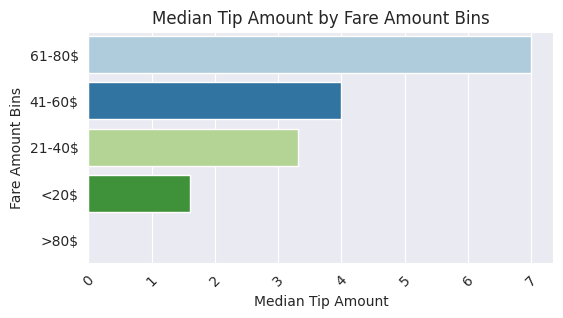

In [64]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x="tip_amount", y="fare_amount_bins", data=grouped_df_fare_tip, palette="Paired")

# Set the x-axis label
plt.xlabel("Median Tip Amount")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Fare Amount Bins")

# Set the title
plt.title("Median Tip Amount by Fare Amount Bins")

plt.show()

Uji Hipotetis:

In [94]:
# Extract the tip amounts for each fare amount bins
tip_amounts_by_fare = [
    df[df["fare_amount_bins"] == bin_]["tip_amount"] for bin_ in grouped_df_fare_tip["fare_amount_bins"]]

# Perform Kruskal-Wallis test
statistic, pvalue = stats.kruskal(*tip_amounts_by_fare)

# Print the results
print("Kruskal-Wallis test results:")
print("Statistic:", statistic)
print("p-value:", pvalue)

# Interpret the results
alpha = 0.05
if pvalue < alpha:
    print("There is statistically significant difference in median tip amount among different fare amount bins.")
else:
    print("There is no statistically significant difference in median tip amount among different fare amount bins.")

Kruskal-Wallis test results:
Statistic: 2932.3227697687707
p-value: 0.0
There is statistically significant difference in median tip amount among different fare amount bins.


**Insight:**

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, ada perbedaan signifikan dalam tip_amount antara fare amount bins. Dengan kata lain, Fare Amount mempengaruhi besarnya tip_amount yang diberikan oleh pelanggan.

Speed dan Tip Amount

In [65]:
# Group the data by speed and tip amount
grouped_df_speed_tip = df.groupby("speed_bins")["tip_amount"].median().reset_index()

# Sort the data by tip amount in descending order
grouped_df_speed_tip = grouped_df_speed_tip.sort_values("tip_amount", ascending=False)

grouped_df_speed_tip

,speed_bins,tip_amount
2,31-40 mph,4.740
1,21-30 mph,2.770
3,41-50 mph,2.200
0,11-20 mph,2.000
4,<10 mph,1.460
5,>50 mph,0.275


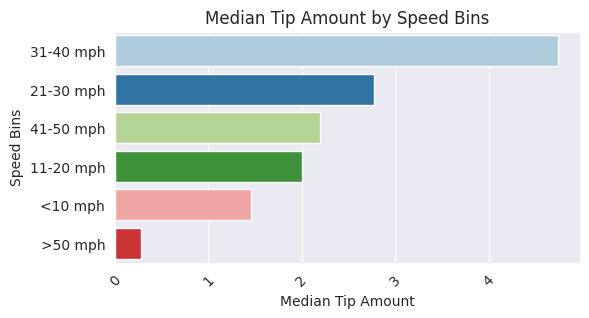

In [66]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x="tip_amount", y="speed_bins", data=grouped_df_speed_tip, palette="Paired")

# Set the x-axis label
plt.xlabel("Median Tip Amount")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Speed Bins")

# Set the title
plt.title("Median Tip Amount by Speed Bins")

plt.show()

Uji Hipotesis:

In [95]:
# Extract the tip amounts for each speed bins
tip_amounts_by_speed = [
    df[df["speed_bins"] == bin_]["tip_amount"] for bin_ in grouped_df_speed_tip["speed_bins"]]

# Perform Kruskal-Wallis test
statistic, pvalue = stats.kruskal(*tip_amounts_by_speed)

# Print the results
print("Kruskal-Wallis test results:")
print("Statistic:", statistic)
print("p-value:", pvalue)

# Interpret the results
alpha = 0.05
if pvalue < alpha:
    print("There is statistically significant difference in median tip amount among different speed bins.")
else:
    print("There is no statistically significant difference in median tip amount among different speed bins.")


Kruskal-Wallis test results:
Statistic: 1036.6697125020673
p-value: 6.911427616629211e-222
There is statistically significant difference in median tip amount among different speed bins.


**Insight:**

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, ada perbedaan signifikan dalam tip_amount antara speed bins. Dengan kata lain, kecepatan berkendara taxi mempengaruhi besarnya tip_amount yang diberikan oleh pelanggan.

2. Are there specific route where tips are higher?

In [67]:
# Group the data by pickup zone and tip amount
grouped_df_puzone_tip = df.groupby("PUzone")["tip_amount"].median().reset_index()

# Sort the data by tip amount in descending order
grouped_df_puzone_tip = grouped_df_puzone_tip.sort_values("tip_amount", ascending=False)

# Get the top 10 pickup zones with the highest median tip amount
top_10_puzones_tip = grouped_df_puzone_tip.head(10)

top_10_puzones_tip

,PUzone,tip_amount
167,Sutton Place/Turtle Bay North,17.460
189,World Trade Center,16.150
170,Upper West Side South,12.435
165,Sunset Park East,12.000
4,Bath Beach,11.400
49,Dyker Heights,7.340
123,Oakland Gardens,6.910
100,Laurelton,6.770
143,Riverdale/North Riverdale/Fieldston,6.040
175,West Brighton,5.000


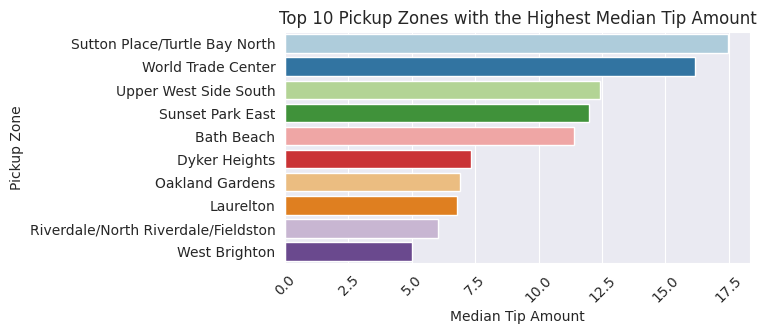

In [68]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x="tip_amount", y="PUzone", data=top_10_puzones_tip, palette="Paired")

# Set the x-axis label
plt.xlabel("Median Tip Amount")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Pickup Zone")

# Set the title
plt.title("Top 10 Pickup Zones with the Highest Median Tip Amount")

# Show the plot
plt.show()

Uji Hipotetis:

In [96]:
# Extract the tip amounts for each pickup zones
tip_amounts_by_puzone = [
    df[df["PUzone"] == zone]["tip_amount"] for zone in top_10_puzones_tip["PUzone"]]

# Perform Kruskal-Wallis test
statistic, pvalue = stats.kruskal(*tip_amounts_by_puzone)

# Print the results
print("Kruskal-Wallis test results:")
print("Statistic:", statistic)
print("p-value:", pvalue)

# Interpret the results
alpha = 0.05
if pvalue < alpha:
    print("There is statistically significant difference in median tip amount among different pickup zones.")
else:
    print("There is no statistically significant difference in median tip amount among different pickup zones.")

Kruskal-Wallis test results:
Statistic: 8.406546336206892
p-value: 0.49375115402430325
There is no statistically significant difference in median tip amount among different pickup zones.


**Insight:**

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, tidak ada perbedaan signifikan dalam tip_amount antara pickup zones. Dengan kata lain, zona penjemputan tidak mempengaruhi besarnya tip_amount yang diberikan oleh pelanggan.

3. Are there specific times (hours, days) where tips are higher?

Day Name dan Tip Amount

In [71]:
# Create a new column with the day name
df['day_name'] = df['lpep_pickup_datetime'].dt.day_name()

# Group the data by day of the week name and tip amount
grouped_df_day_tip = df.groupby("day_name")["tip_amount"].median().reset_index()

# Sort the data by tip amount in descending order
grouped_df_day_tip = grouped_df_day_tip.sort_values("tip_amount", ascending=False)

grouped_df_day_tip

,day_name,tip_amount
3,Sunday,2.000
4,Thursday,1.880
6,Wednesday,1.875
1,Monday,1.850
5,Tuesday,1.830
2,Saturday,1.820
0,Friday,1.670


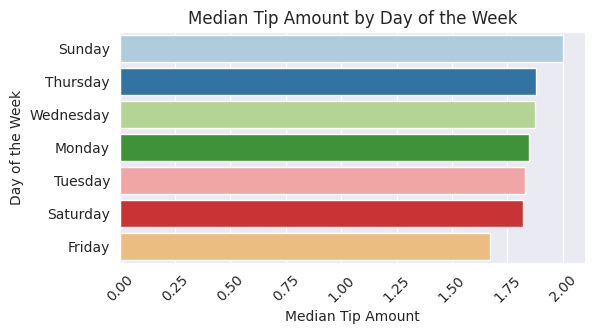

In [72]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x="tip_amount", y="day_name", data=grouped_df_day_tip, palette="Paired")

# Set the x-axis label
plt.xlabel("Median Tip Amount")
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel("Day of the Week")

# Set the title
plt.title("Median Tip Amount by Day of the Week")

# Show the plot
plt.show()


Uji Hipotesis:

In [99]:
# Extract the tip amounts for each day name
tip_amounts_by_day = [
    df[df["day_name"] == day]["tip_amount"] for day in grouped_df_day_tip["day_name"]]

# Perform Kruskal-Wallis test
statistic, pvalue = stats.kruskal(*tip_amounts_by_day)

# Print the results
print("Kruskal-Wallis test results:")
print("Statistic:", statistic)
print("p-value:", pvalue)

# Interpret the results
alpha = 0.05
if pvalue < alpha:
    print("There is statistically significant difference in median tip amount among different day names.")
else:
    print("There is no statistically significant difference in median tip amount among different day names.")

Kruskal-Wallis test results:
Statistic: 26.468314149110263
p-value: 0.00018207500753749176
There is statistically significant difference in median tip amount among different day names.


**Insight:**

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, ada perbedaan signifikan dalam tip_amount antara day name. Dengan kata lain, hari mempengaruhi besarnya tip_amount yang diberikan oleh pelanggan.

Day Category dan Tip Amount

In [73]:
# Group the data by day category and tip amount
grouped_df_day_category_tip = df.groupby('day_category')['tip_amount'].median().reset_index()

grouped_df_day_category_tip

,day_category,tip_amount
0,Weekday,1.82
1,Weekend,2.00


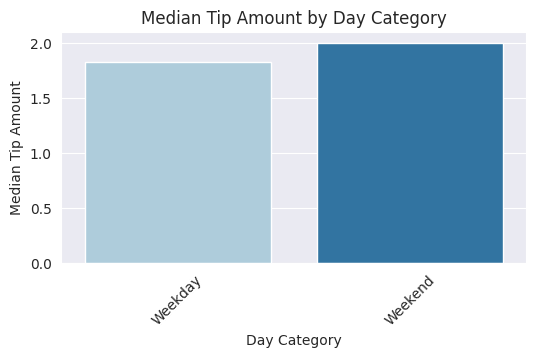

In [74]:
# Create a bar plot for day category
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x='day_category', y='tip_amount', data=grouped_df_day_category_tip, palette='Paired')

# Set the x-axis label
plt.xlabel('Day Category')
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel('Median Tip Amount')

# Set the title
plt.title('Median Tip Amount by Day Category')

# Show the plot
plt.show()

Uji Hipotetis:

In [101]:
# Extract the tip amounts for each day category
tip_amounts_by_day_category = [
    df[df["day_category"] == category]["tip_amount"] for category in grouped_df_day_category_tip["day_category"]]

# Perform Mann-Whitney U test
statistic, pvalue = stats.mannwhitneyu(*tip_amounts_by_day_category)

# Print the results
print("Mann-Whitney U test results:")
print("Statistic:", statistic)
print("p-value:", pvalue)

# Interpret the results
alpha = 0.05
if pvalue < alpha:
    print("There is statistically significant difference in median tip amount among different day categories.")
else:
    print("There is no statistically significant difference in median tip amount among different day categories.")

Mann-Whitney U test results:
Statistic: 372166976.5
p-value: 0.01605410381090577
There is statistically significant difference in median tip amount among different day categories.


**Insight:**

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, ada perbedaan signifikan dalam tip_amount antara day category. Dengan kata lain, weekday dan weekend mempengaruhi besarnya tip_amount yang diberikan oleh pelanggan.

Pickup Hour dan Tip Amount

In [75]:
# Create a new column with the pickup hour
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour

# Group the data by pickup hour and tip amount
grouped_df_hour_tip = df.groupby("pickup_hour")["tip_amount"].median().reset_index()

# Sort the data by tip amount in descending order
grouped_df_hour_tip = grouped_df_hour_tip.sort_values("pickup_hour", ascending=True)

# Print the grouped data
grouped_df_hour_tip

,pickup_hour,tip_amount
0,0,1.00
1,1,1.80
2,2,1.00
3,3,0.00
4,4,0.00
5,5,0.08
6,6,1.88
7,7,2.00
8,8,1.88
9,9,1.74


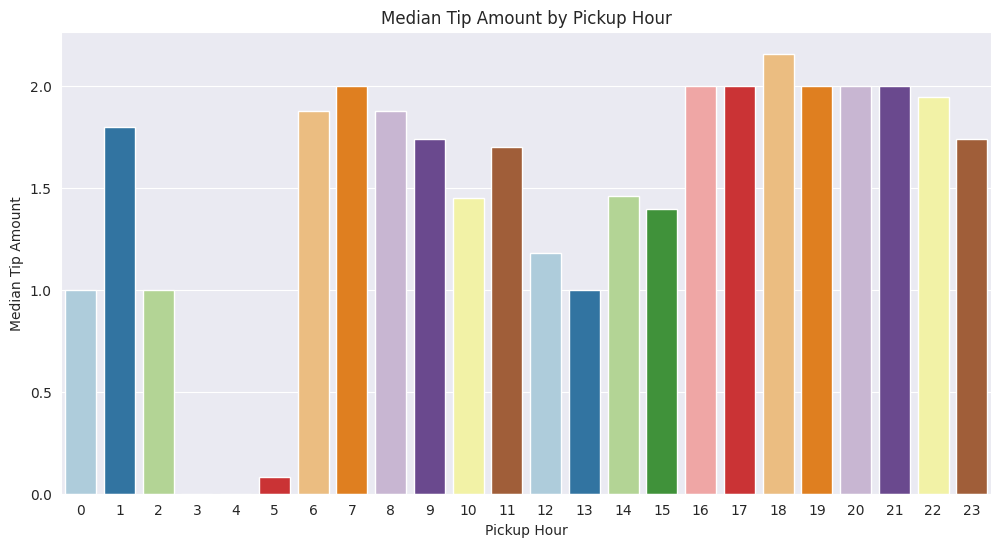

In [76]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(12, 6))
sns.barplot(x="pickup_hour", y="tip_amount", data=grouped_df_hour_tip, palette="Paired")

# Set the x-axis label
plt.xlabel("Pickup Hour")
plt.xticks(ticks=grouped_df_hour_tip["pickup_hour"])

# Set the y-axis label
plt.ylabel("Median Tip Amount")

# Set the title
plt.title("Median Tip Amount by Pickup Hour")

# Show the plot
plt.show()


Uji Hipotetis:

In [102]:
# Extract the tip amounts for each pickup hour
tip_amounts_by_hour = [
    df[df["pickup_hour"] == hour]["tip_amount"] for hour in grouped_df_hour_tip["pickup_hour"]]

# Perform Kruskal-Wallis test
statistic, pvalue = stats.kruskal(*tip_amounts_by_hour)

# Print the results
print("Kruskal-Wallis test results:")
print("Statistic:", statistic)
print("p-value:", pvalue)

# Interpret the results
alpha = 0.05
if pvalue < alpha:
    print("There is statistically significant difference in median tip amount among different pickup hours.")
else:
    print("There is no statistically significant difference in median tip amount among different pickup hours.")


Kruskal-Wallis test results:
Statistic: 261.86025850187883
p-value: 2.123991964587294e-42
There is statistically significant difference in median tip amount among different pickup hours.


**Insight:**

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, ada perbedaan signifikan dalam tip_amount antara pickup hour. Dengan kata lain, jam penjemputan mempengaruhi besarnya tip_amount yang diberikan oleh pelanggan.

Pickup Time Category dan Tip Amount

In [77]:
# Group the data by pickup time category and tip amount
grouped_df_time_category_tip = df.groupby('pickup_time_category')['tip_amount'].median().reset_index()

grouped_df_time_category_tip

,pickup_time_category,tip_amount
0,Evening,2.00
1,Midnight,1.00
2,Morning,1.74
3,Night,2.00
4,Noon,1.45


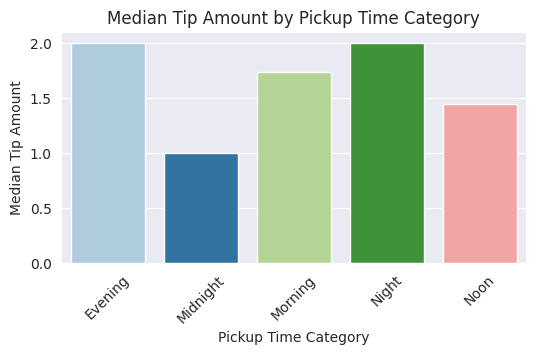

In [78]:
# Create a bar plot for pickup time category
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x='pickup_time_category', y='tip_amount', data=grouped_df_time_category_tip, palette='Paired')

# Set the x-axis label
plt.xlabel('Pickup Time Category')
plt.xticks(rotation=45,)

# Set the y-axis label
plt.ylabel('Median Tip Amount')

# Set the title
plt.title('Median Tip Amount by Pickup Time Category')

# Show the plot
plt.show()


Uji Hipotetis:

In [103]:
# Extract the tip amounts for each pickup time category
tip_amounts_by_time_category = [
    df[df["pickup_time_category"] == category]["tip_amount"] for category in grouped_df_time_category_tip["pickup_time_category"]]

# Perform Kruskal-Wallis test
statistic, pvalue = stats.kruskal(*tip_amounts_by_time_category)

# Print the results
print("Kruskal-Wallis test results:")
print("Statistic:", statistic)
print("p-value:", pvalue)

# Interpret the results
alpha = 0.05
if pvalue < alpha:
    print("There is statistically significant difference in median tip amount among different pickup time categories.")
else:
    print("There is no statistically significant difference in median tip amount among different pickup time categories.")


Kruskal-Wallis test results:
Statistic: 118.40309267578844
p-value: 1.1713933440657628e-24
There is statistically significant difference in median tip amount among different pickup time categories.


**Insight:**

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, ada perbedaan signifikan dalam tip_amount antara pickup hour category. Dengan kata lain, kategori jam penjemputan mempengaruhi besarnya tip_amount yang diberikan oleh pelanggan.

4. Are there specific times Trip Types and Rate where tips are higher?

Rate Code dan Tip Amount

In [79]:
# Group the data by rate code and tip amount
grouped_df_rate_tip = df.groupby('Rate')['tip_amount'].median().reset_index()

# Sort the data by tip amount in descending order
grouped_df_rate_tip = grouped_df_rate_tip.sort_values("tip_amount", ascending=False)

grouped_df_rate_tip

,Rate,tip_amount
0,JFK Airport,15.60
3,Newark Airport,5.30
4,Standard Rate,1.88
1,Nassau or Westchester,0.00
2,Negotiated Fare,0.00


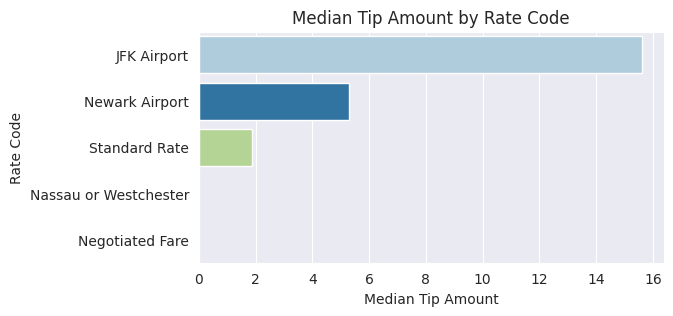

In [80]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
sns.barplot(x='tip_amount', y='Rate', data=grouped_df_rate_tip, palette='Paired')

# Set the x-axis label
plt.xlabel('Median Tip Amount')

# Set the y-axis label
plt.ylabel('Rate Code')

# Set the title
plt.title('Median Tip Amount by Rate Code')

# Show the plot
plt.show()

Uji Hipotesis:

In [104]:
# Extract the tip amounts for each rate
tip_amounts_by_rate = [
    df[df["Rate"] == rate]["tip_amount"] for rate in grouped_df_rate_tip["Rate"]]

# Perform Kruskal-Wallis test
statistic, pvalue = stats.kruskal(*tip_amounts_by_rate)

# Print the results
print("Kruskal-Wallis test results:")
print("Statistic:", statistic)
print("p-value:", pvalue)

# Interpret the results
alpha = 0.05
if pvalue < alpha:
    print("There is statistically significant difference in median tip amount among different rate codes.")
else:
    print("There is no statistically significant difference in median tip amount among different rate codes.")

Kruskal-Wallis test results:
Statistic: 135.57216560106994
p-value: 2.5025275544086144e-28
There is statistically significant difference in median tip amount among different rate codes.


**Insight:**

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, ada perbedaan signifikan dalam tip_amount antara rate. Dengan kata lain, tipe rate perjalanan taxi mempengaruhi besarnya tip_amount yang diberikan oleh pelanggan.

In [81]:
# Group the data by trip type and tip amount
grouped_df_trip_type_tip = df.groupby('trip_type')['tip_amount'].median().reset_index()

# Sort the data by tip amount in descending order
grouped_df_trip_type_tip = grouped_df_trip_type_tip.sort_values("tip_amount", ascending=False)

grouped_df_trip_type_tip

,trip_type,tip_amount
1,Street-hail,1.88
0,Dispatch,0.00


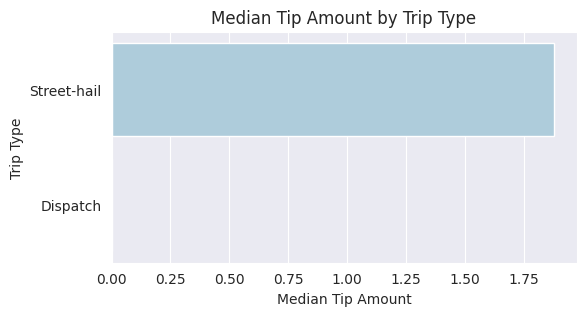

In [82]:
# Create a bar plot
sns.set_style('darkgrid')

plt.figure(figsize=(6, 3))
ax = sns.barplot(x='tip_amount', y='trip_type', data=grouped_df_trip_type_tip, palette='Paired')

# Set the x-axis label
plt.xlabel('Median Tip Amount')

# Set the y-axis label
plt.ylabel('Trip Type')

# Set the title
plt.title('Median Tip Amount by Trip Type')


# Show the plot
plt.show()

Uji Hipotesis:

In [105]:
# Extract the tip amounts for trip type
tip_amounts_by_trip_type = [
    df[df["trip_type"] == trip_type]["tip_amount"] for trip_type in grouped_df_trip_type_tip["trip_type"]]

# Perform Mann-Whitney U test
statistic, pvalue = stats.mannwhitneyu(*tip_amounts_by_trip_type)

# Print the results
print("Mann-Whitney U test results:")
print("Statistic:", statistic)
print("p-value:", pvalue)

# Interpret the results
alpha = 0.05
if pvalue < alpha:
    print("There is statistically significant difference in median tip amount among different trip types.")
else:
    print("There is no statistically significant difference in median tip amount among different trip types.")

Mann-Whitney U test results:
Statistic: 20538248.5
p-value: 0.00018370989942526915
There is statistically significant difference in median tip amount among different trip types.


**Insight:**

Berdasarkan data yang dimiliki dan pada tingkat signifikansi 5%, ada perbedaan signifikan dalam tip_amount antara trip type. Dengan kata lain, tipe perjalanan taxi mempengaruhi besarnya tip_amount yang diberikan oleh pelanggan.

## Conclusion and Recommendation

### **Conclusion:**

Taxi demand in New York City

- Tanggal puncak permintaan taksi terjadi pada weekdays, terutama Kamis dan Jumat, ditandai dengan adanya mobilitas yang meningkat selama minggu kerja sehingga membutuhkan layanan taksi.

- Sebaliknya, permintaan yang lebih rendah terjadi pada akhir pekan (minggu) dan hari libur (hari tahun baru dan hari lahir Martin Luther King Jr.), hal ini ditandao dengan aktivitas perjalanan yang berkurang karena masyarakat Kota New York cenderung berdiam diri di rumah atau menggunakan kendaraan pribadi untuk berlibur.

- Jam penjemputan menunjukkan dua puncak harian: satu di pagi hari selama perjalanan ke tempat kerja atau sekolah dan yang lainnya di sore hari selama perjalanan pulang.

- Zona penjemputan yang paling banyak terpusat di Borough Manhattan.

Customer Preferences and Behaviour

- Customer Taxi di Kota New York sebagian besar menggunakan kartu kredit (lebih dari 80%) untuk pembayaran taksi, menunjukkan preferensi untuk kenyamanan dan keamanan.

- Sebagian besar perjalanan (99,9%) adalah street-hail, hal ini karena metode pemanggilan taksi ini cukup populer dan mudah diakses.

- Sebagian besar perjalanan adalah jarak pendek, dengan sebagian besar hanya berlangsung kurang dari 20 menit dan menempuh jarak kurang dari 10 mil. Hal ini menunjukkan bahwa taksi terutama digunakan untuk transportasi lokal di dalam Kota New York.

- Pelanggan lebih memilih standar rate untuk perjalanan taksi, mencerminkan sebagian besar perjalanan terjadi di dalam Kota New York.

Fare Structures for NYC Taxi Services


- Jumlah tarif dan total jumlahnya umumnya meningkat dengan jarak dan durasi perjalanan yang meningkat.

- Ada waktu-waktu tertentu (misalnya tengah malam) dan lokasi-lokasi tertentu (misalnya Bronx, Brooklyn) di mana penyesuaian tarif berpotensi meningkatkan pendapatan.

- Menganalisis kategori waktu pengambilan, zona pengambilan, dan borough pengambilan dapat memberikan wawasan untuk menyesuaikan tarif demi peningkatan pendapatan.

- Penting untuk mempertimbangkan baik jumlah tarif maupun total jumlahnya ketika mengevaluasi struktur tarif.

Tips for NYC Taxi Services

- Jarak perjalanan, durasi perjalanan, jumlah tarif, dan kecepatan secara signifikan mempengaruhi jumlah tip.

- Tidak ada zona penjemputan khusus di mana tips lebih tinggi.

- Tips lebih tinggi di akhir pekan dan selama jam tertentu dalam sehari.

- Kode tarif dan jenis perjalanan juga memengaruhi jumlah tip.

- Tidak ada waktu tertentu di mana tips lebih tinggi.

### Recommendation :


1. Penjadwalan Kendaraan Taksi:
- Tingkatkan jumlah taksi yang tersedia selama jam-jam sibuk pada pagi hari (05.00-11.00) dan sore hari (15.00-20.00) serta di lokasi-lokasi permintaan tinggi seperti di Borough Manhattan untuk mengurangi waktu tunggu pelanggan.

- Kurangi jumlah taksi pada hari minggu dan libur nasional lain. Selain itu, kurangi juga jumlah armada taksi pada jam-jam permintaan rendah seperti midnight (00.00-05.00).

- Gunakan data historis dan analisis prediktif untuk mengoptimalkan penjadwalan armada dan memastikan ketersediaan taksi yang cukup.

- Menyesuaikan penjadwalan armada berdasarkan faktor-faktor lain seperti event, kondisi cuaca, dan pola lalu lintas.



2. Penargetan Wilayah:
- Identifikasi zona penjemputan yang paling menguntungkan seperti pada Borough Manhattan dan fokuskan upaya pemasaran dan penjangkauan di wilayah tersebut.

- Analisis pola permintaan dan sesuaikan strategi penargetan wilayah secara berkala untuk memaksimalkan pendapatan.

- Pertimbangkan untuk menawarkan diskon untuk perjalanan dari wilayah yang kurang populer seperti pada Borough Staten Island dan Bronx.

- Menawarkan insentif kepada pengemudi untuk beroperasi di area-area dengan permintaan tinggi.

- Bekerja sama dengan bisnis lokal dan organisasi masyarakat untuk mempromosikan layanan taksi di area-area tersebut.

3. Strategi Berdasarkan Harga

- Memberi tarif yang lebih tinggi selama waktu-waktu sibuk seperti pada hari Kamis-Jumat pagi hari (05.00-11.00) dan sore hari (15.00-20.00)atau di lokasi-lokasi tertentu seperti di Borough Manhattan.

- Menawarkan tarif yang lebih rendah selama waktu-waktu permintaan rendah seperti pada hari minggu dan libur nasional dan weekday pada dini hari (00.00-05.00) serta di lokasi-lokasi yang kurang populer seperti pada Borough Staten Island dan Bronx..

- Menawarkan diskon untuk perjalanan jarak jauh.

- Menawarkan paket tarif untuk pelanggan setia.

- Perkenalkan program loyalitas atau sistem poin untuk mendorong pelanggan menggunakan layanan taksi secara berulang.

- Pantau dampak perubahan tarif terhadap permintaan dan pendapatan secara berkala.

4. Opsi Pembayaran
- Terus dukung penggunaan kartu kredit sebagai metode pembayaran utama.

- Pertimbangkan untuk memperkenalkan opsi pembayaran digital lainnya seperti dompet elektronik dan pembayaran tanpa kontak untuk meningkatkan kenyamanan dan keamanan pelanggan.

- Pastikan bahwa sistem pembayaran aman dan mudah digunakan.

- Pertimbangkan untuk menawarkan diskon atau insentif untuk pelanggan yang menggunakan opsi pembayaran tertentu.


5. Trip Perjalanan
- Terus pertahankan metode pemanggilan taksi street-hail karena masih populer dan mudah diakses.

- Pastikan bahwa sistem pemesanan mudah digunakan dan dapat diakses oleh pelanggan.

- Pertimbangkan untuk menawarkan diskon atau insentif untuk pelanggan yang menggunakan opsi pemesanan online (Dispatch)

6. Peningkatan Kualitas Pelayanan
- Pantau dan ukur waktu tunggu rata-rata dan waktu perjalanan untuk mengidentifikasi area yang perlu ditingkatkan.

- Terapkan teknologi untuk mengoptimalkan rute dan mengurangi waktu perjalanan.

- Berikan pelatihan kepada pengemudi tentang cara mengemudi yang aman dan efisien.

- Pastikan bahwa kendaraan taksi dalam kondisi baik dan terawat dengan baik.

7. Promosi dan Penawaran

- Tawarkan diskon atau promosi untuk perjalanan jarak jauh (seperti pada perjalan > 20 miles).

- Buat paket tarif yang menarik untuk perjalanan pulang-pergi atau perjalanan beberapa hari.

- Bekerjasama dengan bisnis lokal atau organisasi masyarakat untuk menawarkan diskon atau promosi khusus bagi pelanggan mereka.